<a href="https://colab.research.google.com/github/PrajwalChittora/FitBit-Data-Analysis-using-Python/blob/main/FitBit_Data_Analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FitBit Data Analysis using Python
**Project Context:**

This project is part of my Google Analytics Professional Certification. It's a case study analyzing fitness data within the context of a wellness tech company.

**Problem Statement:**

Bellabeat, a health-focused tech company specializing in women's products, seeks insights into smart device usage patterns to optimize its marketing strategy.

**Role:**

As a junior data analyst, analyze smart device data to identify trends and make marketing recommendations for a selected Bellabeat product.

**Key Questions:**

* What are the overarching trends in smart device usage?
* How do these trends relate to Bellabeat's target customers?
* How can Bellabeat leverage these insights for improved marketing?

**Deliverables:**

* Concise summary of the business task
* Description of data sources
* Documentation of data cleaning/manipulation
* Analysis summary
* Visualizations supporting key findings
* Top-level marketing recommendations

[Case Study Details (provided in the course itself)](https://d3c33hcgiwev3.cloudfront.net/OLtArwsxSlar_y35df7xmQ_634dd308c7a04d24bdfdb9367f24d5f1_Case-Study-2_-How-can-a-wellness-technology-company-play-it-smart.pdf?Expires=1710979200&Signature=iabdFhWf8iGwgo5gyu9IHlsljOqc32-FxrP-TUP052J69~5pnGxGSEIoYdzGvTtcqPiy9AuGdIgHDAWj42ql4FtyYZbkZA4N9rKQRm1hrMB8zk4E5jArQHkTemAAceR7dlOn9T4j3xfkceZL2uQpi2Ex8xKCiih6VJNmDYdbsi8_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A)

# Ask
* **Task:** Use smart device data to identify usage patterns.  Leverage these insights to create targeted marketing campaigns for Bellabeat.
* **Question:** How can we align Bellabeat's marketing with the way people actually use their devices?
* **Stakeholders:** Bellabeat's leadership team (Urška Sršen, Sando Mur) and the marketing analytics team.




# Prepare
To discover how current user trends can guide marketing, we'll turn to the Fitbit Fitness Tracker Dataset (available on Kaggle under a CC0 Public Domain license). This dataset contains detailed activity, heart rate, and sleep information from 33 Fitbit users who consented to share their data.  We'll analyze these user behaviors to tailor marketing strategies.

To better read our files let's create a path variable to store the folder path containing all csv files.


In [370]:
import sqlite3 as sql
# import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [371]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set_style('whitegrid')
sns.set_palette('Set3')

In [372]:
path = "/content/Dataset"
## Get the full path of all the csv files.
full_path_list = [os.path.join(path,f) for\
                 f in os.listdir(path) if os.path.isfile(os.path.join(path,f)) ]

In [373]:
len(full_path_list)

18

In [374]:
full_path_list



['/content/Dataset/minuteIntensitiesNarrow_merged.csv',
 '/content/Dataset/weightLogInfo_merged.csv',
 '/content/Dataset/hourlyIntensities_merged.csv',
 '/content/Dataset/sleepDay_merged.csv',
 '/content/Dataset/hourlyCalories_merged.csv',
 '/content/Dataset/minuteStepsNarrow_merged.csv',
 '/content/Dataset/minuteCaloriesNarrow_merged.csv',
 '/content/Dataset/dailyActivity_merged.csv',
 '/content/Dataset/dailyCalories_merged.csv',
 '/content/Dataset/heartrate_seconds_merged.csv',
 '/content/Dataset/minuteMETsNarrow_merged.csv',
 '/content/Dataset/dailySteps_merged.csv',
 '/content/Dataset/minuteCaloriesWide_merged.csv',
 '/content/Dataset/minuteSleep_merged.csv',
 '/content/Dataset/minuteStepsWide_merged.csv',
 '/content/Dataset/minuteIntensitiesWide_merged.csv',
 '/content/Dataset/dailyIntensities_merged.csv',
 '/content/Dataset/hourlySteps_merged.csv']

# Process
To clean and transform our data we will create a database using the sqlite3 module as an interface for SQLite in Python. By doing this we can use SQL queries to quickly interact with our data.

**Creating the database**

First of all, we need to create the database. We do this by creating a connection and starting a cursor in the desired database:

In [375]:
con = sql.connect("fitbit.db")
cur = con.cursor()

To easily insert all csv files as different tables in our database we can create a helper function to return the name of the csv file (without extension) to use as the table name.

In [376]:
def get_table_name(full_path_list, i):
    '''Returns name of csv file with no extension'''
    return full_path_list[i].split('/')[-1].split('.')[0]

Having this we can use the pandas library to insert all files as tables in our fitbit.db database. We do this by first reading the file as a pandas dataframe object (using the read_csv method) then we insert it into the database using the to_sql method with the proper connection to the database.

In [377]:
for i in range(0,18):
    pd.read_csv(full_path_list[i]).to_sql(get_table_name(full_path_list, i), con, if_exists='append', index=False)

We include if_exists='append' to prevent accidentally deleting existing database entries when adding new data.

For verification, we'll use pandas to query our database and create a dataframe, allowing us to quickly check if the data was populated correctly.

In [270]:
df = pd.read_sql(f'SELECT * FROM {get_table_name(full_path_list, 0)}', con)

Now we can use the head() method to show the first 5 rows of data from the first inserted table.

In [271]:
df.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0.0
1,1503960366,4/12/2016 12:01:00 AM,0.0
2,1503960366,4/12/2016 12:02:00 AM,0.0
3,1503960366,4/12/2016 12:03:00 AM,0.0
4,1503960366,4/12/2016 12:04:00 AM,0.0


Finally, we can list all tables in our data base using a SQL query:

In [272]:
# Listing all tables
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cur.fetchall()
print(tables)
print(50*'=')
print(f'Total of {len(tables)} tables in database.')

[('minuteIntensitiesNarrow_merged',), ('weightLogInfo_merged',), ('hourlyIntensities_merged',), ('sleepDay_merged',), ('hourlyCalories_merged',), ('minuteStepsNarrow_merged',), ('minuteCaloriesNarrow_merged',), ('dailyActivity_merged',), ('dailyCalories_merged',), ('heartrate_seconds_merged',), ('minuteMETsNarrow_merged',), ('dailySteps_merged',), ('minuteCaloriesWide_merged',), ('minuteSleep_merged',), ('minuteStepsWide_merged',), ('minuteIntensitiesWide_merged',), ('dailyIntensities_merged',), ('hourlySteps_merged',)]
Total of 18 tables in database.


**Checking for redundant information**

We will work with the tables with daily logs of activitys. There are a total of 5 tables with daily our Day in their names. Let's inspect them for redundant information.

To take a closer look at the daily data, let's read table dailyActivity_merged as a dataframe.

In [273]:
dailyActivity_df = pd.read_sql(f'SELECT * FROM dailyActivity_merged', con)

dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4-12-0-0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4-13-0-0,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4-14-0-0,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4-15-0-0,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4-16-0-0,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


We do the same for the dailyIntensities_merged table.

In [274]:
dailyIntensities_df = pd.read_sql(f'SELECT * FROM dailyIntensities_merged', con)

dailyIntensities_df.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


These tables appear to have shared columns. Let's first find out if they have the same number of rows.

In [275]:
print(f'dailyActivity_df length: {len(dailyActivity_df)}')
print(f'dailyIntensities_df length: {len(dailyIntensities_df)}')

dailyActivity_df length: 2820
dailyIntensities_df length: 2820


We suspect that the 'dailyIntensities_merged' table might contain information that's already present in 'dailyActivity_merged'.  The following query will help us verify this; it should return an empty result if the distance and activity minute columns across both tables are completely identical.

In [276]:
query = """
SELECT VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes,
       FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
FROM dailyActivity_merged
EXCEPT
SELECT VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes,
       FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
FROM dailyIntensities_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


Just like before, we suspect there might be redundant information between the 'dailyActivity_merged' and 'dailySteps_merged' tables.  They both contain data on the total steps taken each day – named 'TotalSteps' in one table and 'StepTotal' in the other.  We can use an EXCEPT statement to confirm whether these columns are truly identical.

In [277]:
query = """
SELECT TotalSteps from dailyActivity_merged
EXCEPT
SELECT StepTotal from dailySteps_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


We repeat the same process for column Calories in dailyCalories_merged:

In [278]:
query = """
SELECT Calories from dailyActivity_merged
EXCEPT
SELECT Calories from dailyCalories_merged;
"""
cur.execute(query)
print(cur.fetchall())

[]


So, tables dailyIntensities_merged, dailySteps_merged and dailyCalories_merged will not be used further as all information on them is contained in table dailyActivity_merged.

**Updating table to better read date information**

We can update the ActivityDate column in dailyActivity_merged table to match the standard YYY-MM-DD from SQLite.

In [279]:
update_date = """
UPDATE dailyActivity_merged set ActivityDate =
	SUBSTR(ActivityDate, -4)
	|| "-" ||
	CASE
		WHEN LENGTH(
			SUBSTR( -- picking month info
				ActivityDate, 1, INSTR(ActivityDate, '/') - 1
			)
		) > 1 THEN
			SUBSTR( -- picking month info
				ActivityDate, 1, INSTR(ActivityDate, '/') - 1
			)
		ELSE '0' ||
			SUBSTR( -- picking month info
				ActivityDate, 1, INSTR(ActivityDate, '/') - 1
			)
	END
	|| "-" ||
	CASE
	WHEN LENGTH(
		SUBSTR( -- picking day info
			SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), '/') - 1 -- go all the way to next /
		)
	) > 1 THEN
		SUBSTR( -- picking day info
			SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), '/') - 1 -- go all the way to next /
		)
	ELSE '0' ||
		SUBSTR( -- picking day info
			SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(ActivityDate, INSTR(ActivityDate, '/') + 1), '/') - 1 -- go all the way to next /
		)
	END;
"""
cur.execute(update_date)

In [280]:
con.commit()

In [281]:
con.close()

**Data reagrding sleeping habits**

We can expand our analysis by delving into the dedicated sleep data table.  A quick query will give us an overview of the information it contains.

In [282]:
con = sql.connect("fitbit.db")# Reconnecting to the database
cur = con.cursor()

In [283]:
sleep_query = """
SELECT
	*
FROM
	sleepDay_merged;
"""

sleep_df = pd.read_sql(sleep_query, con)

In [284]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,-0-0,1,327,346
1,1503960366,-0-0,2,384,407
2,1503960366,-0-0,1,412,442
3,1503960366,-0-0,2,340,367
4,1503960366,-0-0,1,700,712


Updating the day to match SQLite format YYYY-MM-DD

In [285]:
update_date = """
UPDATE sleepDay_merged set SleepDay =
	SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), -4)
	|| "-" ||
	CASE
		WHEN LENGTH(
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
		) > 1 THEN
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
		ELSE '0' ||
			SUBSTR( -- picking month info
				SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), 1, INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') - 1
			)
	END
	|| "-" ||
	CASE
	WHEN LENGTH(
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	) > 1 THEN
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	ELSE '0' ||
		SUBSTR( -- picking day info
			SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), -- pick substring starting after first /
			1,  -- start new substring at first character of newly selected substring
			INSTR(SUBSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), INSTR(SUBSTR(SleepDay, 1, LENGTH(SleepDay) - 12), '/') + 1), '/') - 1 -- go all the way to next /
		)
	END;
"""
cur.execute(update_date)

In [286]:
con.commit()

In [287]:
con.close()

In [288]:
# Reconnecting to the database
con = sql.connect("fitbit.db")
cur = con.cursor()

Now we can check if the updates are correct:

* For the sleep table:





In [289]:
sleep_query = """
SELECT *,
	STRFTIME('%w',SleepDay) dow
FROM sleepDay_merged;
"""

sleep_df = pd.read_sql(sleep_query, con)

In [290]:
sleep_df.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,dow
0,1503960366,-0-0,1,327,346,None
1,1503960366,-0-0,2,384,407,None
2,1503960366,-0-0,1,412,442,None
3,1503960366,-0-0,2,340,367,None
4,1503960366,-0-0,1,700,712,None


The date now is in the proper YYYY-MM-DD format.

* For the activity table:

In [291]:
dailyActivity_df = pd.read_sql('SELECT * FROM dailyActivity_merged', con)

In [292]:
dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,-0-0-0-0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,-0-0-0-0,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,-0-0-0-0,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,-0-0-0-0,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,-0-0-0-0,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


Now that the dates are properly formatted, we can move on to extracting valuable information.  We'll use the STRFTIME() function (just like we did with the sleep data) to isolate the day, month, year, and day of the week (dow).

In [293]:
full_info_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow
FROM dailyActivity_merged;
"""

full_dailyActivity_df = pd.read_sql(full_info_activity, con)

We saved the resulting query in a larger dataframe named full_dailyActivity_df. The first 5 rows of this dataframe are as follows.

In [294]:
full_dailyActivity_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow
0,1503960366,-0-0-0-0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,None,None,None,None
1,1503960366,-0-0-0-0,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,None,None,None,None
2,1503960366,-0-0-0-0,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,None,None,None,None
3,1503960366,-0-0-0-0,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,None,None,None,None
4,1503960366,-0-0-0-0,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,None,None,None,None


# Analysis


To make our future analysis smoother, we'll craft some helpful dataframes from our updated tables. We'll begin by double-checking the daily activity table for any potential issues.

In [295]:
# Different users
cur.execute("SELECT COUNT(DISTINCT Id) FROM dailyActivity_merged;")
print('Different users: ', cur.fetchall()[0][0])

Different users:  33


Data on Average Calories, Steps and Distance by Id and by day of the **week**

In [296]:
# Average Calories, Steps and Distance by Id and by day of the week
query = """
SELECT
	Id,
	STRFTIME('%w', ActivityDate) dow,
	ROUND(AVG(Calories),2) AS avg_calories,
	ROUND(AVG(TotalSteps),2) AS avg_steps,
	ROUND(AVG(TotalDistance),2) AS avg_distance
FROM dailyActivity_merged
GROUP BY Id, STRFTIME('%w', ActivityDate);
"""

activity_dist = pd.read_sql(query, con)

In [297]:
activity_dist.head()

,Id,dow,avg_calories,avg_steps,avg_distance
0,1503960366,None,1816.42,12116.74,7.81
1,1503960366,0,1769.00,10101.50,6.57
2,1503960366,1,1939.25,13780.75,8.96
3,1503960366,2,1967.80,13946.60,8.92
4,1503960366,3,1868.80,12656.60,8.23


"Boolean" column to check if date corresponds to weekend


In [298]:
weekend_query = """
SELECT
	Id,
	ActivityDate,
	SedentaryMinutes,
	VeryActiveMinutes,
	FairlyActiveMinutes,
	LightlyActiveMinutes,
	Calories,
	TotalSteps,
	TotalDistance,
	CASE
		WHEN STRFTIME('%w',ActivityDate) IN ('0','6')
			THEN 1
		ELSE 0
	END weekend
FROM dailyActivity_merged;
"""

weekend_check = pd.read_sql(weekend_query, con)

weekend_check.head()

,Id,ActivityDate,SedentaryMinutes,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,Calories,TotalSteps,TotalDistance,weekend
0,1503960366,-0-0-0-0,728,25,13,328,1985,13162,8.50,0
1,1503960366,-0-0-0-0,776,21,19,217,1797,10735,6.97,0
2,1503960366,-0-0-0-0,1218,30,11,181,1776,10460,6.74,0
3,1503960366,-0-0-0-0,726,29,34,209,1745,9762,6.28,0
4,1503960366,-0-0-0-0,773,36,10,221,1863,12669,8.16,0


**NOTE: day of week 0-6 with Sunday==0**

Joining activity data with sleep data


In [299]:
join_query = """
SELECT
	A.Id,
	A.ActivityDate,
	A.SedentaryMinutes,
	A.LightlyActiveMinutes,
	S.TotalMinutesAsleep
FROM
	dailyActivity_merged A
INNER JOIN sleepDay_merged S
ON
	A.Id = S.Id AND
    A.ActivityDate = S.SleepDay;
"""
activity_sleep_df = pd.read_sql(join_query, con)

activity_sleep_df.head()

,Id,ActivityDate,SedentaryMinutes,LightlyActiveMinutes,TotalMinutesAsleep
0,1503960366,2016-04-12,728,328,327
1,1503960366,2016-04-13,776,217,384
2,1503960366,2016-04-15,726,209,412
3,1503960366,2016-04-16,773,221,340
4,1503960366,2016-04-17,539,164,700


**Initial Exploratory Visualisation**

* **Question:** How do users distribute their time across different activity levels?
* **Data:** The 'dailyActivity_df' contains the following metrics:
    * VeryActiveMinutes & VeryActiveDistance
    * FairlyActiveMinutes & ModeratelyActiveDistance
    * VeryLightlyActiveMinutes & LightActiveDistance
    * SedentaryMinutes & SedentaryActiveDistance
* **Method:** Visualize each activity pair (distance vs. minutes) as a scatter plot with a regression line.  This will help estimate typical speeds.
* **Ease of Comparison:** Employ a shared y-scale across all plots.


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,-0-0-0-0,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,-0-0-0-0,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,-0-0-0-0,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,-0-0-0-0,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,-0-0-0-0,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
2816,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
2817,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
2818,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


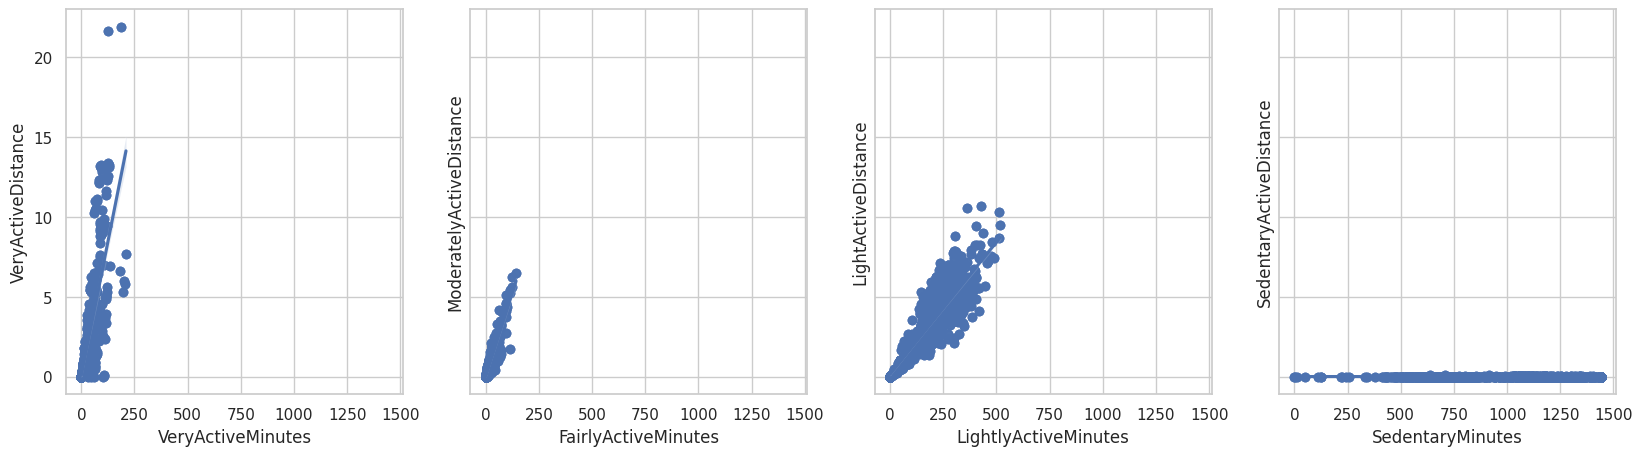

In [300]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True, sharex=True)

sns.regplot(data=dailyActivity_df,
            x='VeryActiveMinutes',
            y='VeryActiveDistance',
            ax=axes[0])

sns.regplot(data=dailyActivity_df,
            x='FairlyActiveMinutes',
            y='ModeratelyActiveDistance',
            ax=axes[1])

sns.regplot(data=dailyActivity_df,
            x='LightlyActiveMinutes',
            y='LightActiveDistance',
            ax=axes[2])

sns.regplot(data=dailyActivity_df,
            x='SedentaryMinutes',
            y='SedentaryActiveDistance',
            ax=axes[3]);dailyActivity_df

**Analysis of Activity Speeds**

* As expected, the scatter plots reveal a clear trend:  **Very Active Minutes** correspond to the greatest distances traveled, translating to steeper regression lines and thus higher estimated speeds. This is followed by **Fairly Active Minutes** and **Lightly Active Minutes**.
* **Investigating Activity Classification:**  These findings raise an interesting question: How does the device differentiate between "Light" and "Moderate" activities?  Understanding this classification system would provide valuable context for interpreting user activity data.


**How does the number of steps taken in a day affect the amount of calories burned?**

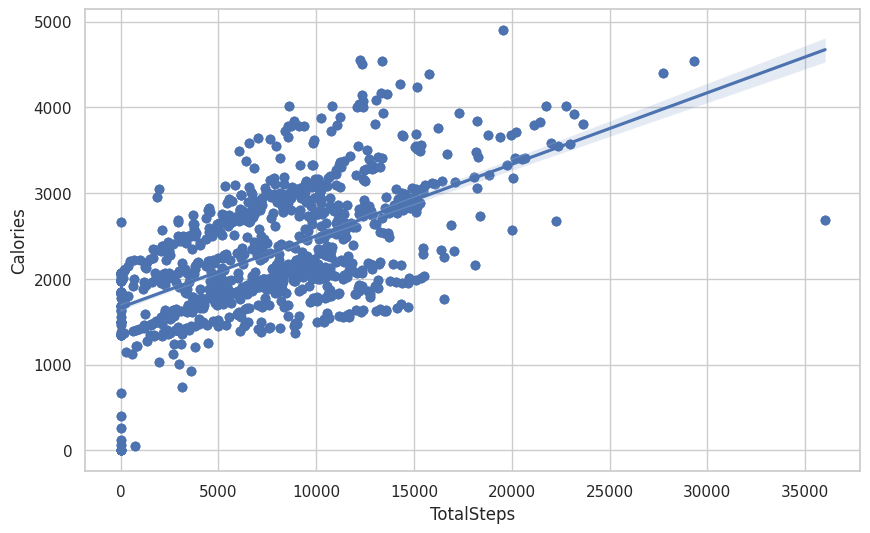

In [301]:
sns.regplot(data = full_dailyActivity_df, x= 'TotalSteps', y ='Calories');

As expected, there's a positive correlation between daily calories burned and steps taken. Interestingly, the regression line's intercept tells us an estimated calorie burn even with zero steps – this aligns with the concept of the basal metabolic rate (BMR), the calories your body burns at rest. According to Healthline, BMR varies by sex, weight, height, and age. For example, a 35-year-old man (175 lbs, 5'11") has an estimated BMR of 1,816 calories, while a 35-year-old woman (135 lbs, 5'5") has an estimated BMR of 1,383 calories.  To compare these with our data, we'll use scikit-learn to find our regression line's intercept.  Let's start by importing the necessary packages.

In [302]:
import numpy as np
from sklearn.linear_model import LinearRegression

Now we define our inputs (X) and outputs (y) for the regression. This should be arrays so we take the .values from our dataframes:

In [303]:
X = full_dailyActivity_df['TotalSteps'].values.reshape((-1, 1))
y = full_dailyActivity_df['Calories'].values

We call .reshape() on X because this array is required to be two-dimensional, or to be more precise, to have one column and as many rows as necessary. That's exactly what the argument (-1, 1) of .reshape() specifies.

Next, we instantiate the model and fit it to the data.

In [304]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

With the fitted model, we can get the intercept value and the slope as follows.

In [305]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1665.7426768758328
slope: [0.08351327]


With these, we would like to draw the regression line in the same figure as the scatter plot for our data and see if the fit is similar to that obtained with seaborn's regplot. To actually draw the line, we define a abline function to use matplotlib to draw a line in 2D space from the slope and intercept.

In [306]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color= 'r', ls = '--')

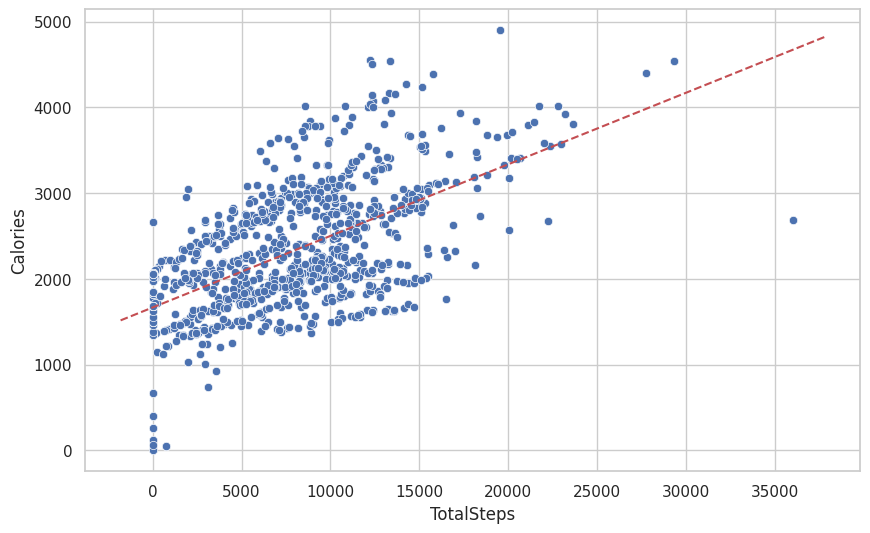

In [307]:
sns.scatterplot(data = full_dailyActivity_df, x= 'TotalSteps', y ='Calories')
abline(model.coef_, model.intercept_);

That's interesting! Our data predicts a BMR of around 1665.74 calories, falling between the typical values for men and women of similar age. To investigate this further, let's isolate the days where users took zero steps. Analyzing the calorie burn on those days will give us a more direct look at their BMR distribution. We can easily do this using a Pandas 'describe' function along with a mask to select only the zero-step data.

In [308]:
full_dailyActivity_df[full_dailyActivity_df['TotalSteps']==0]['Calories'].describe()

count     231.000000
mean     1657.077922
std       554.654905
min         0.000000
25%      1496.000000
50%      1841.000000
75%      1980.000000
max      2664.000000
Name: Calories, dtype: float64

The calorie distribution displays an outlier at 0 (minimum) and extends to a maximum of 2664. Analyzing quartiles, mean, and standard deviation will provide insights into the central tendency and variation of the data.

Let's inspect the possible outliers:

In [309]:
full_dailyActivity_df[full_dailyActivity_df['Calories']==0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow
30,1503960366,-0-0-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
653,6290855005,-0-0-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
817,8253242879,-0-0-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
879,8583815059,-0-0-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
970,1503960366,5-12-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
1593,6290855005,5-10-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
1757,8253242879,4-30-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
1819,8583815059,5-12-0-0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,None,None,None,None
1910,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,12,05,2016,4
2533,6290855005,2016-05-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0,10,05,2016,2


We've identified four suspicious rows where all activity categories show zero values, except for 'SedentaryMinutes', which is maxed out at 1440 minutes (24 hours). This likely indicates a device malfunction or a day when the tracker wasn't worn at all.  To ensure accurate analysis, we should remove these data points.

We redefine our full_dailyActivity_df dropping the outliers:

In [310]:
full_info_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow
FROM
	dailyActivity_merged
WHERE
	Calories <> 0;
"""

full_dailyActivity_df = pd.read_sql(full_info_activity, con)

In [311]:
len(full_dailyActivity_df)

2808

Our data frame is now 936 rows long, given we dropped the four outliers. We can now see if these made a difference in the regression parameters. To simplify our flow, let's turn the regression process into a single function:

In [312]:
def get_regression(full_dailyActivity_df, x ='TotalSteps', y = 'Calories'):
    X = full_dailyActivity_df[x].values.reshape((-1, 1))
    y = full_dailyActivity_df[y].values

    model = LinearRegression()
    model.fit(X, y)

    print('intercept:', model.intercept_)
    print('slope:', model.coef_)

    sns.scatterplot(data = full_dailyActivity_df, x= x, y =y)
    # plt.title('Calories burned by number of steps taken')
    abline(model.coef_, model.intercept_);

    return (model.intercept_, model.coef_)

intercept: 1689.1510000144012
slope: [0.08138959]


(1689.1510000144012, array([0.08138959]))

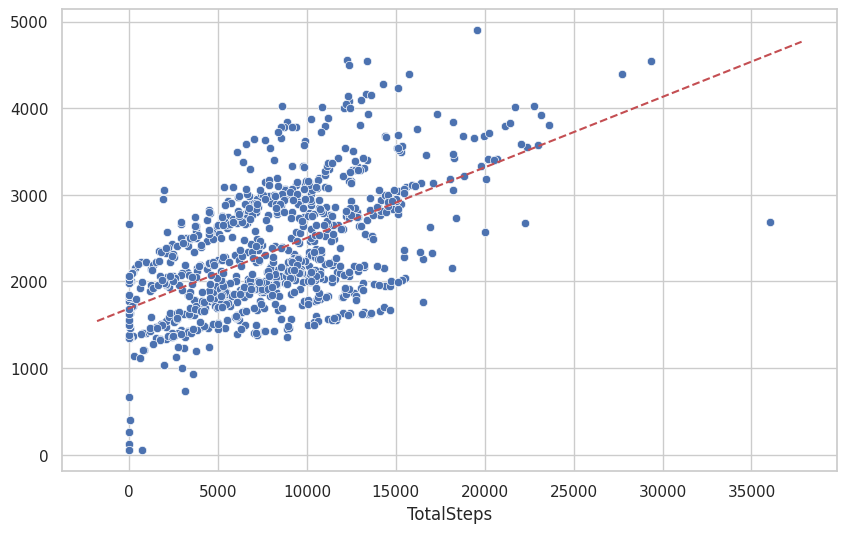

In [313]:
get_regression(full_dailyActivity_df)

Wihtout the outliers, our fit has a slightly higher intercept of ~1689.15 (correspondong to the BMR).

**Distribution according to type of activity**

Excluding SedentaryMinutes, all users spend their daily time between three types of activities:

* VeryActiveMinutes
* FairlyActiveMinutes
* VeryLightlyActiveMinutes

We can use histograms to check how are this minutes distributed accross users:

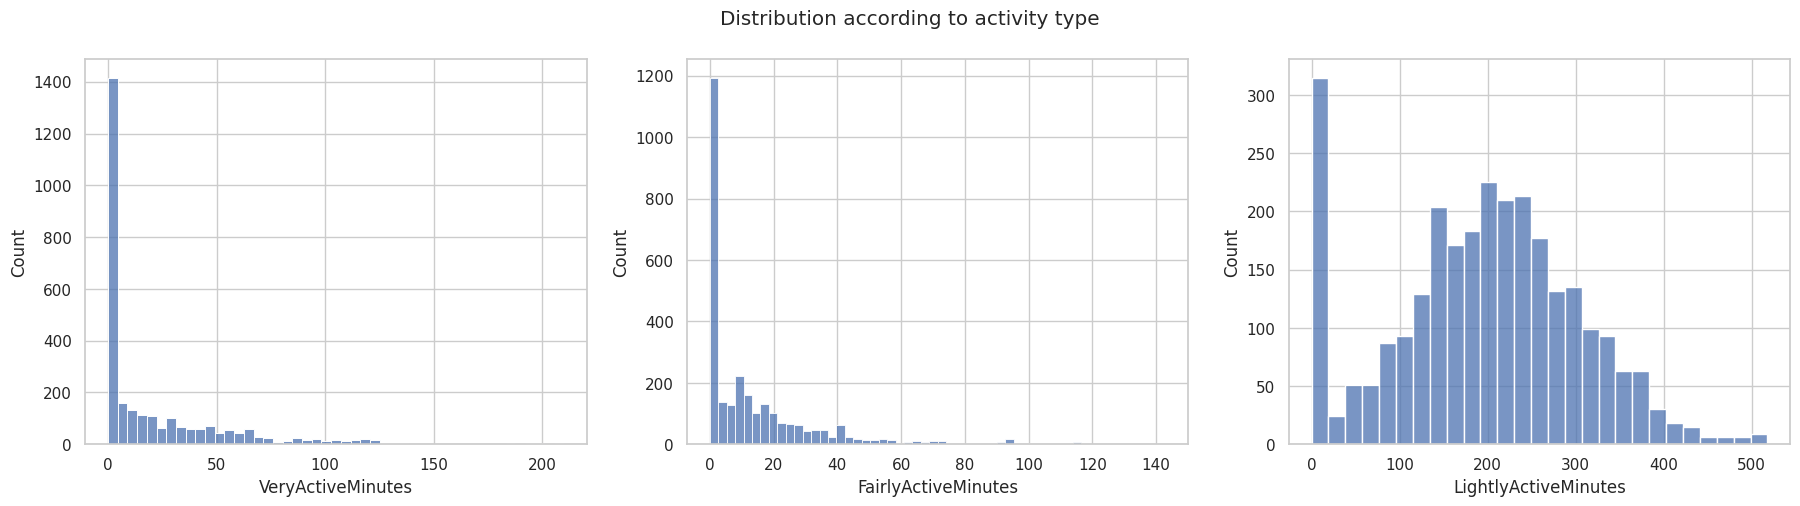

In [314]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = full_dailyActivity_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = full_dailyActivity_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = full_dailyActivity_df, x = 'LightlyActiveMinutes', ax = axes[2]);

The plots suggest that many users (over 400) dedicate minimal time to high-intensity activities ('VeryActiveMinutes' and 'FairlyActiveMinutes'). The distribution of 'LightlyActiveMinutes', excluding extremely low values, shows a symmetrical pattern. However, a data quality concern arises: we can't be sure if all users wore the tracker for a full day. To correctly assess activity levels, the sum of activity minutes should total 1440 per day.

Let's use SQL to select only those points where this condition is true:

In [315]:
full_day_activity = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow,
	VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes+SedentaryMinutes AS TotalMinutes
FROM
	dailyActivity_merged
WHERE
	Calories <> 0 AND
	TotalMinutes = 1440;
"""

logged_day_df = pd.read_sql(full_day_activity, con)

In [316]:
logged_day_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow,TotalMinutes
0,1503960366,-0-0-0-0,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,None,None,None,None,1440
1,1503960366,-0-0-0-0,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,None,None,None,None,1440
2,1503960366,-0-0-0-0,12764,8.13,8.13,0.0,4.76,1.12,2.24,0.0,66,27,130,1217,1827,None,None,None,None,1440
3,1503960366,-0-0-0-0,18134,12.21,12.21,0.0,6.40,0.41,5.41,0.0,78,11,243,1108,2159,None,None,None,None,1440
4,1503960366,-0-0-0-0,11100,7.15,7.15,0.0,2.46,0.87,3.82,0.0,36,22,203,1179,1819,None,None,None,None,1440


In [317]:
print(f'There are {len(logged_day_df)} rows where users logged the whole day.')

There are 1422 rows where users logged the whole day.


We can, now, see the distributions in these rows:

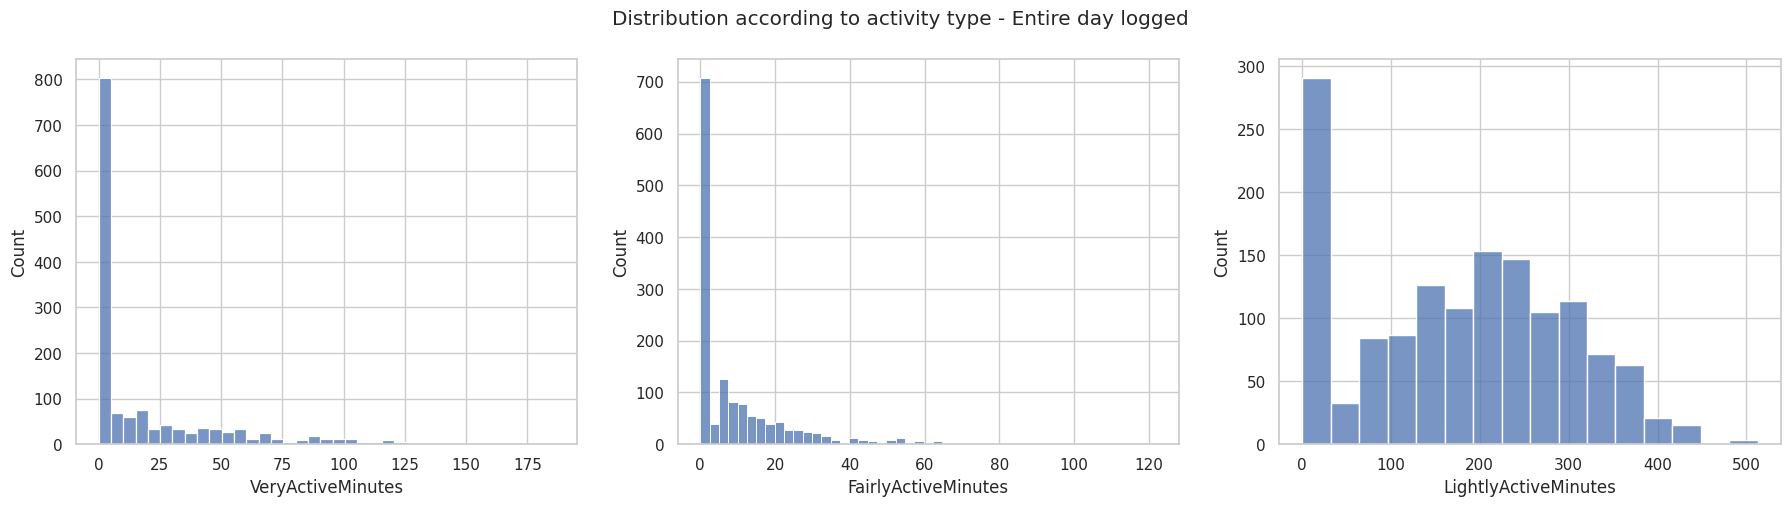

In [318]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Entire day logged')

sns.histplot(data = logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

The behavior appears consistent. Our next step is to analyze the data from days with incomplete tracking (less than 24 hours).

In [319]:
not_full_day = """
SELECT *,
	STRFTIME('%d',ActivityDate) day,
	STRFTIME('%m',ActivityDate) month,
	STRFTIME('%Y',ActivityDate) year,
	STRFTIME('%w',ActivityDate) dow,
	VeryActiveMinutes+FairlyActiveMinutes+LightlyActiveMinutes+SedentaryMinutes AS TotalMinutes
FROM
	dailyActivity_merged
WHERE
	Calories <> 0 AND
	TotalMinutes <> 1440;
"""

not_logged_day_df = pd.read_sql(not_full_day, con)

In [320]:
not_logged_day_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,month,year,dow,TotalMinutes
0,1503960366,-0-0-0-0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,None,None,None,None,1094
1,1503960366,-0-0-0-0,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,None,None,None,None,1033
2,1503960366,-0-0-0-0,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,None,None,None,None,998
3,1503960366,-0-0-0-0,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,None,None,None,None,1040
4,1503960366,-0-0-0-0,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,None,None,None,None,761


In [321]:
print(f'There are {len(not_logged_day_df)} rows where users logged parts of the day.')

There are 1386 rows where users logged parts of the day.


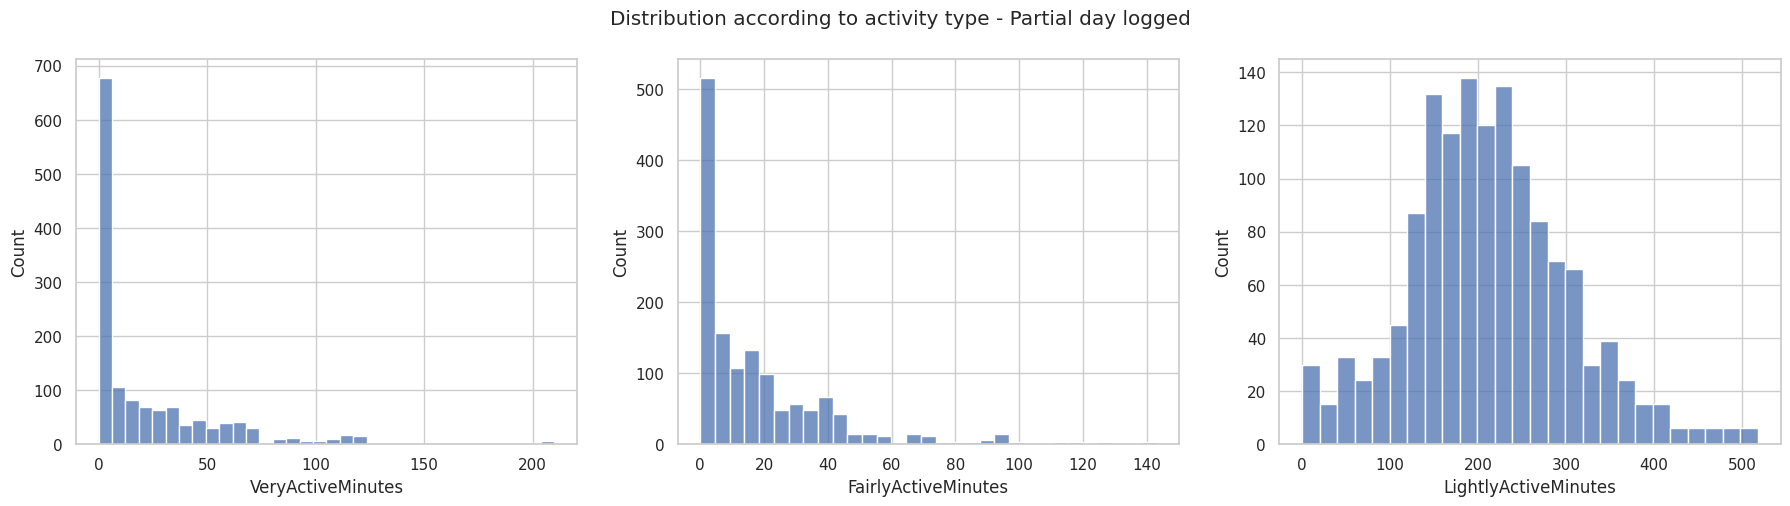

In [322]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = not_logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = not_logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

This analysis reveals a clear distinction! When focusing on days with complete tracking, the 'LightlyActiveMinutes' distribution exhibits a symmetrical pattern without the peak at extremely low values.  This suggests that users logging the entire day naturally accumulate more light activity, while those logging partially might only capture higher-intensity activity periods.

Let's see the distribution of total logged time in this second group.

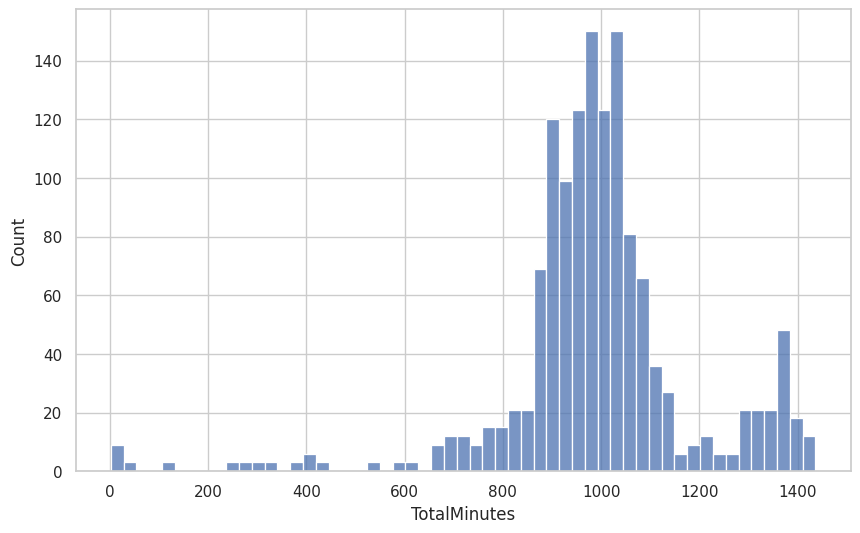

In [323]:
sns.histplot(data = not_logged_day_df, x = 'TotalMinutes');

**Sleeping habits and week day distributions**

We can use histograms again to see the distribution of sleeping time for all users.

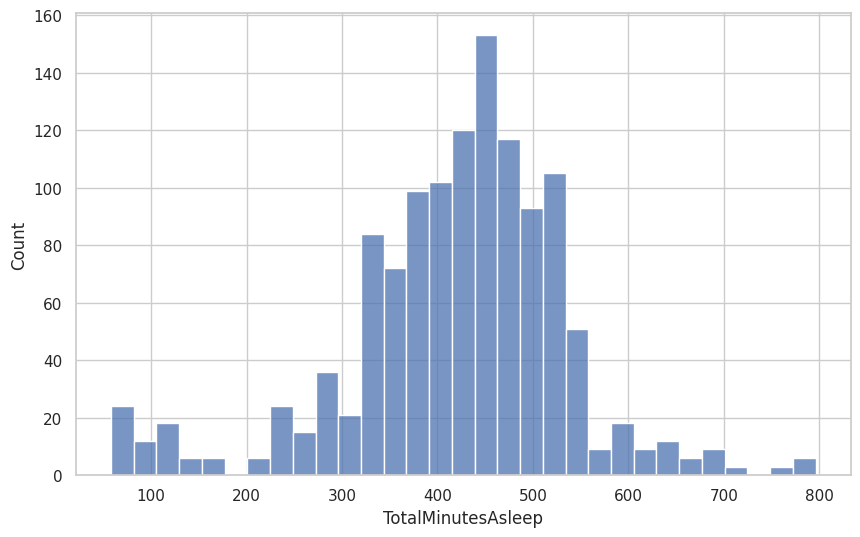

In [324]:
sns.histplot(data = sleep_df, x = 'TotalMinutesAsleep');

According to the CDC an adult should get 7 or more hours of sleep per day. This corresponds to 420 minutes. We can plot a line at this value to see how the users do against this recommendation.

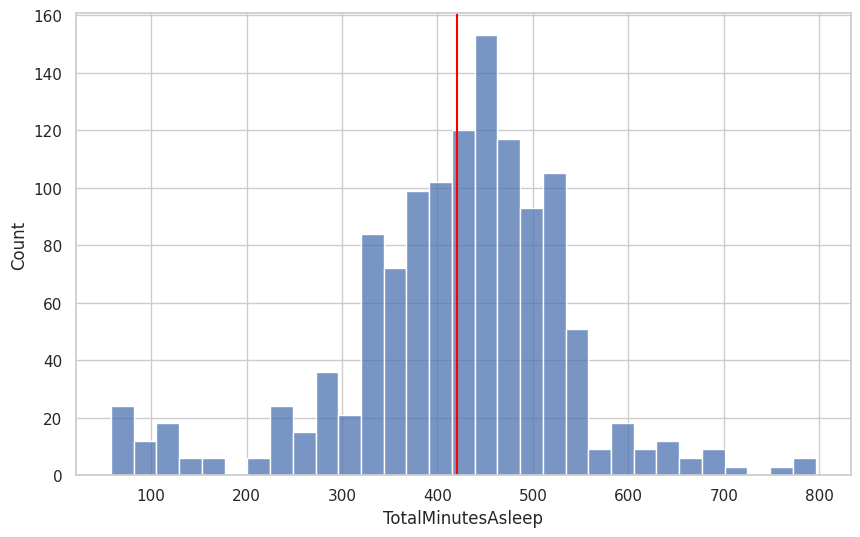

In [325]:
sns.histplot(data = sleep_df, x = 'TotalMinutesAsleep')
plt.axvline(420, 0, 65, color='red');

The distribution is somewhat symmetric with 231 rows to the right of the line (including the line) and 182 rows to the left.

We can further inspect the distribution of minutes asleep per week day:

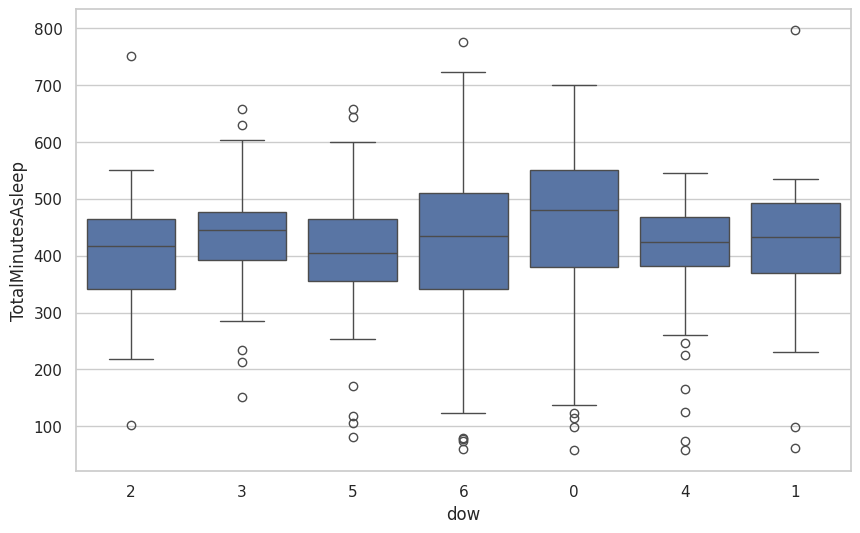

In [326]:
sns.boxplot(x="dow", y="TotalMinutesAsleep", data=sleep_df);

We can order this plot by the day of the week:

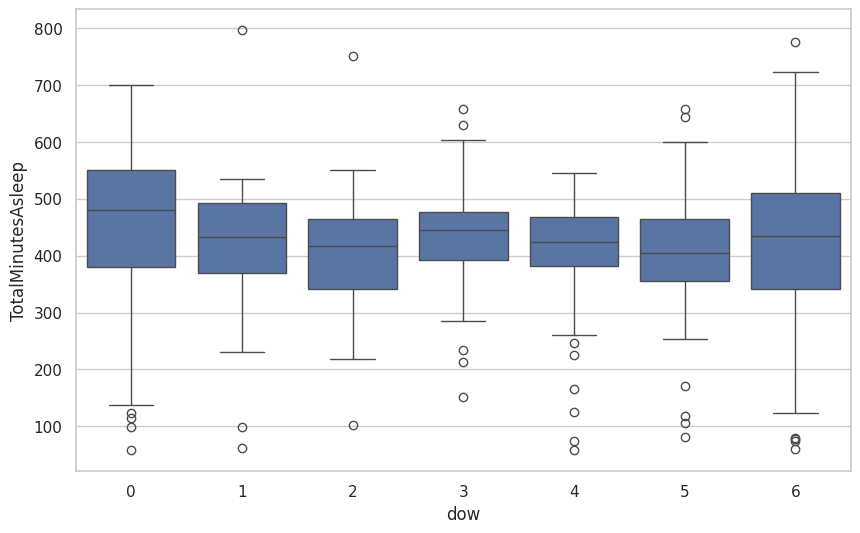

In [327]:
sns.boxplot(x="dow", y="TotalMinutesAsleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']);

There is no clear distinction between the days of the week. However we can see that sunday has the largest median for TotalMinutesAsleep and saturday appears to be the most spread out distribution.

While we are looking at distributions across days of the week, we can use our activity_dist dataframe to inspect the average values of steps, calories and distances:

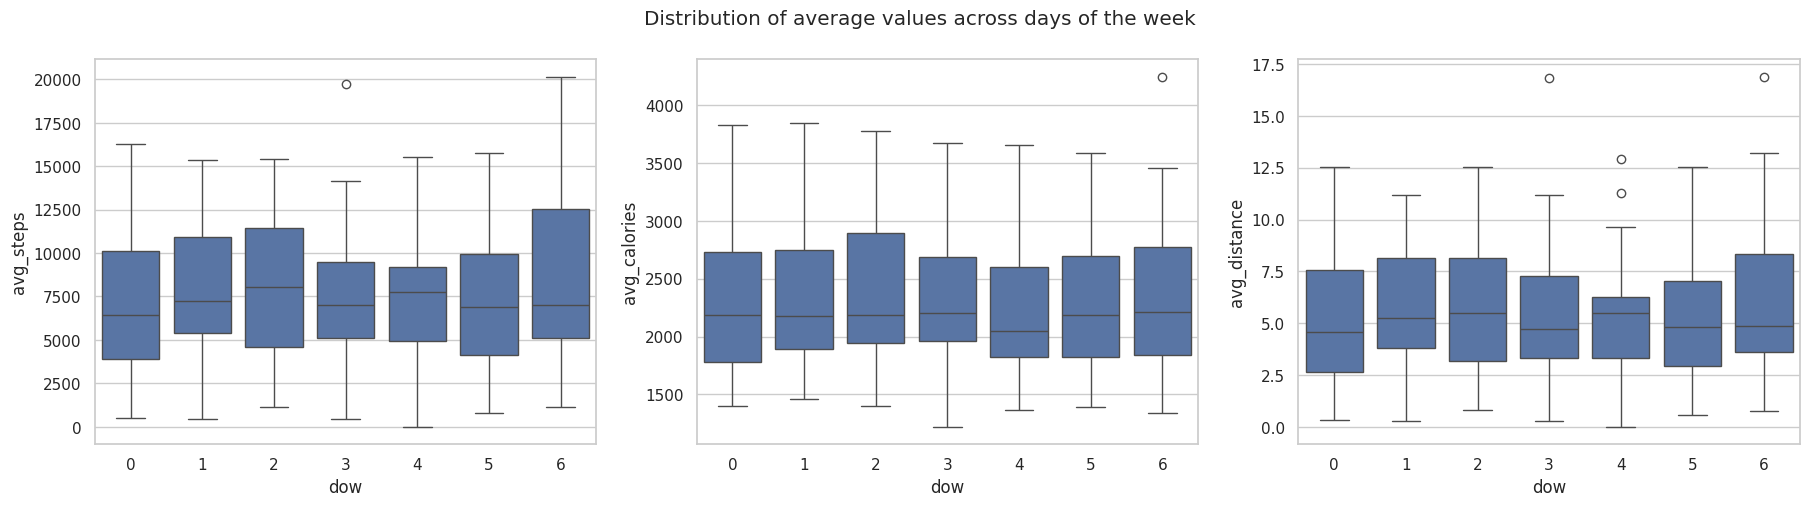

In [328]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="dow", y="avg_steps", data=activity_dist, ax=axes[0]);

sns.boxplot(x="dow", y="avg_calories", data=activity_dist, ax=axes[1]);

sns.boxplot(x="dow", y="avg_distance", data=activity_dist, ax=axes[2]);

**Distribution of calories and distance**

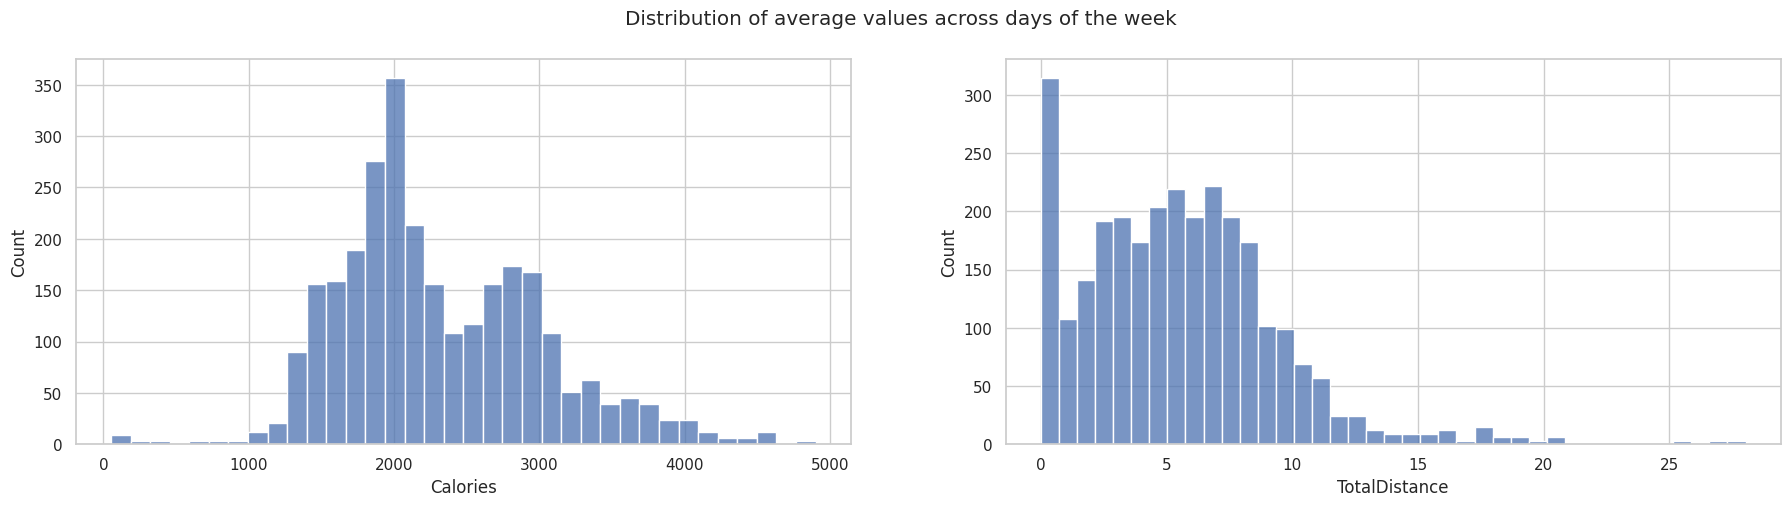

In [329]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.histplot(data=full_dailyActivity_df, x="Calories", ax = axes[0]);

sns.histplot(data=full_dailyActivity_df, x="TotalDistance", ax = axes[1]);

The distribution of burned calories is a bit skewed to the low calories while the distance distribtion is higly skewed to lower distances.

**How does sedentary minutes change in weekends?**

First of all, not considering the day of the week, let's take a look at the distribtuion of SedentaryMinutes:

<Axes: xlabel='SedentaryMinutes', ylabel='Count'>

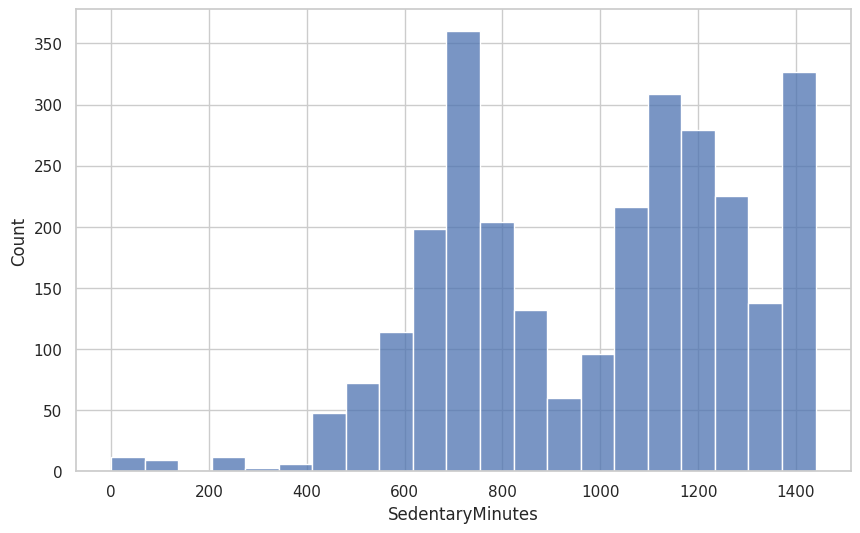

In [330]:
sns.histplot(data= weekend_check, x = 'SedentaryMinutes')

Our next step is to visualize weekend vs. weekday distribution shifts. We'll employ faceted plotting with the 'weekend_check' dataframe. Normalization will ensure fair comparison despite the smaller number of weekend days.

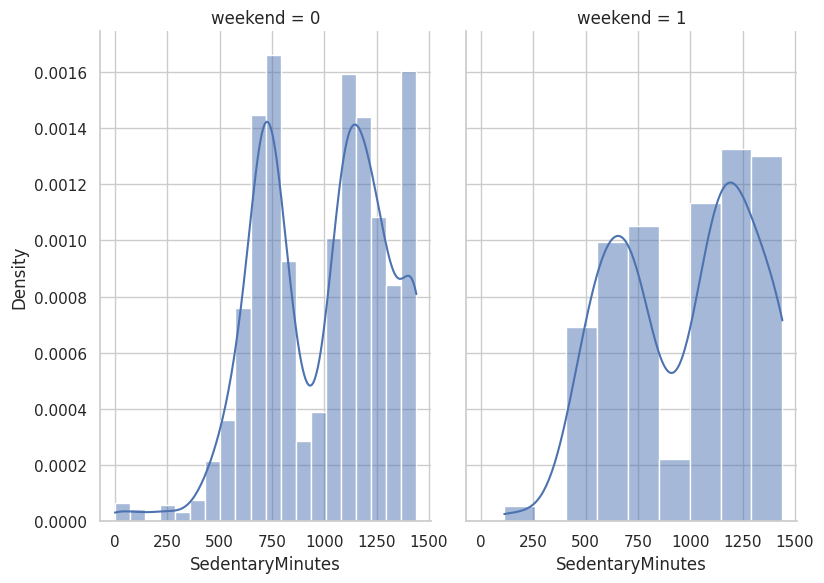

In [331]:
g = sns.FacetGrid(weekend_check, col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

It seems there are two groups of users based on the distribution of SedentaryMinutes. We can do a query to get the average SedentaryMinutes per user:

In [332]:
query = """
SELECT
	Id,
	AVG(SedentaryMinutes) AS AvgSedentaryMinutes
FROM
	dailyActivity_merged
GROUP BY
	Id
ORDER BY
	AvgSedentaryMinutes DESC;
"""
avg_sed_minutes = pd.read_sql(query, con)

avg_sed_minutes

,Id,AvgSedentaryMinutes
0,1927972279,1317.419355
1,6775888955,1299.423077
2,8253242879,1287.368421
3,8583815059,1267.225806
4,1624580081,1257.741935
5,4020332650,1237.258065
6,2320127002,1220.096774
7,4057192912,1217.250000
8,1844505072,1206.612903
9,6290855005,1193.034483


A bar plot will be nice to visually see this numbers:

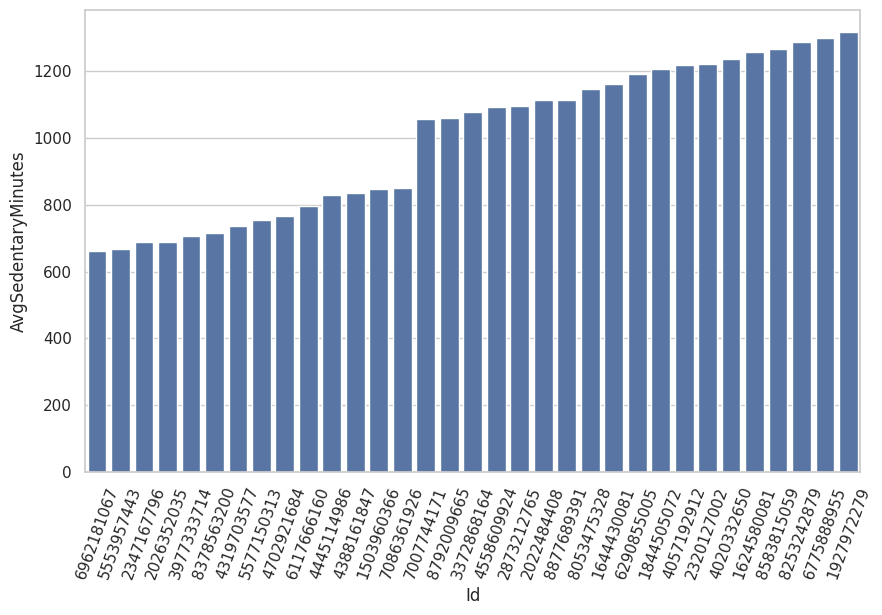

In [333]:
sns.barplot(data = avg_sed_minutes,
            x = 'Id', y = 'AvgSedentaryMinutes',
            order=avg_sed_minutes.sort_values('AvgSedentaryMinutes',ascending = True)['Id'])
plt.xticks(rotation=70);

The average SedentaryMinutes is given by:

In [334]:
cur.execute("SELECT	AVG(SedentaryMinutes) FROM dailyActivity_merged;")
sedMinAvg = cur.fetchall()[0][0]
print(sedMinAvg)

991.2106382978724


We can create a column to identify this user group. We'll call group 1 those with SedentaryMinutes above average and group 0, those bellow.

In [335]:
def is_above(user):
    '''Returns 1 if user has average SedentaryMinutes above the total average and 0 otherwise'''
    return int(avg_sed_minutes[avg_sed_minutes['Id']==user]['AvgSedentaryMinutes'].values[0] > sedMinAvg)

In [336]:
weekend_check['UserGroup'] = weekend_check['Id'].apply(is_above)

In [337]:
# Rows in each group
print(f'Rows in group 0 (Less Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==0]))
print(f'Rows in group 1 (More Sedentary group):')
print(len(weekend_check[weekend_check['UserGroup']==1]))

#Distinct users in each group
print('Distinct users in group 0 (Less Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(weekend_check[weekend_check['UserGroup']==1]['Id'].nunique())

Rows in group 0 (Less Sedentary group):
1248
Rows in group 1 (More Sedentary group):
1572
Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
19


Visual on the number of rows in each group:

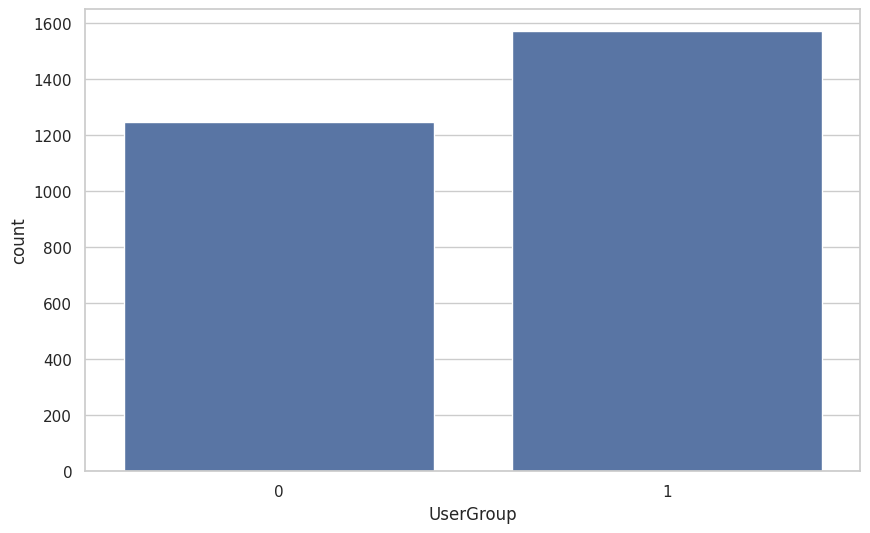

In [338]:
sns.countplot(data=weekend_check, x = 'UserGroup');

Using a boxplot we can clearly see the difference of these groups:

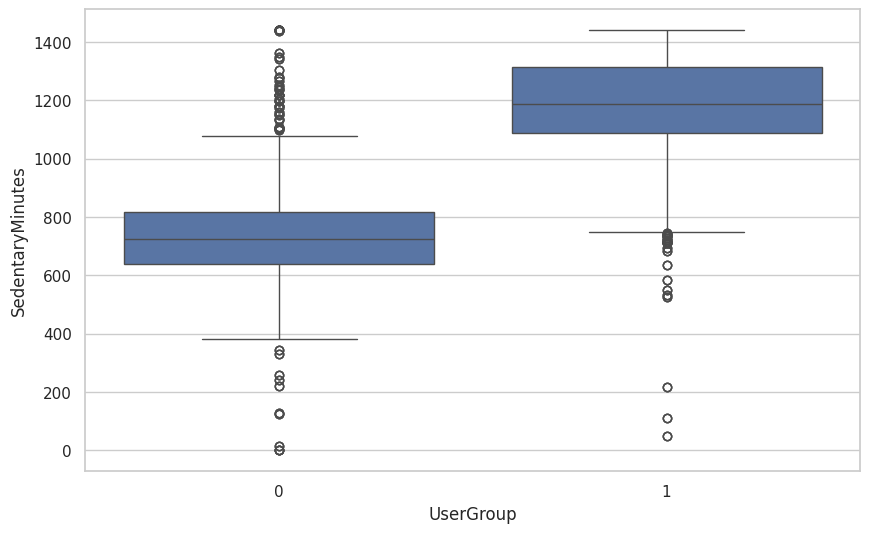

In [339]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", data=weekend_check);

Group 1 is the more sedentary one as it has a higher median for the SedentaryMinutes distribution.

**Does this behaviour persist on weekends?**

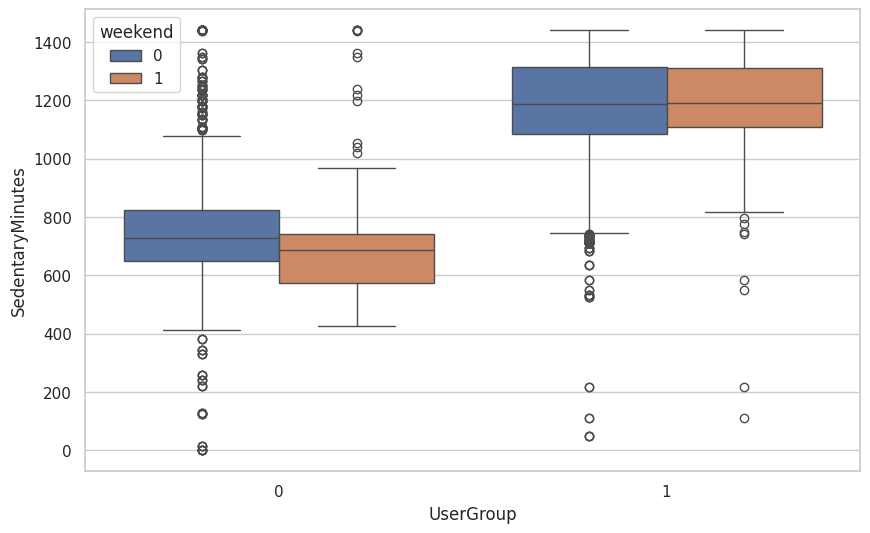

In [340]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", hue = 'weekend', data=weekend_check);

**For the less sedentary group, is there a difference in the shape of the distribution on weekends?**


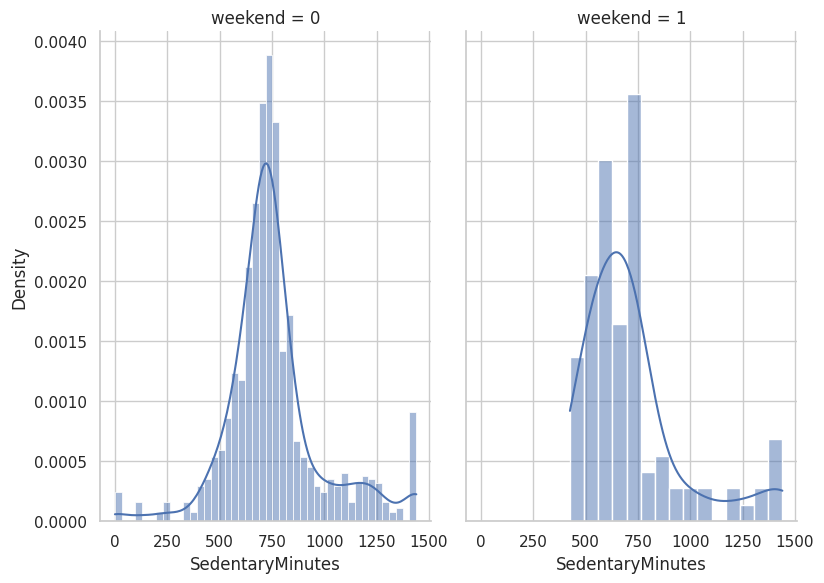

In [341]:
g = sns.FacetGrid(weekend_check[weekend_check['UserGroup']==0], col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

**Investigating Weekend Activity Patterns**

* **Observation:** The skewed sedentary minutes distribution hints at increased weekend activity.
* **Question:** Do average activity metrics (calories, steps, distance) also shift on weekends?
* **Analysis Approach:**
    1. Create a temporary table with a "weekend" flag column.
    2. Calculate averages for sedentary minutes, calories, steps, and distance, grouped by the "weekend" flag.


In [342]:
# Create temporary table for weekend column
temp_query = """
CREATE TEMP TABLE weekendTable
AS
SELECT
	SedentaryMinutes,
	Calories,
	TotalSteps,
	TotalDistance,
	CASE
		WHEN STRFTIME('%w',ActivityDate) IN ('0','6')
			THEN 1
		ELSE 0
	END weekend
FROM dailyActivity_merged
-- Created temp table to check for weekends on weekend column
"""
cur.execute(temp_query)

In [343]:
# Get averages from SQL GROUP BY statement
avg_query = """
SELECT
	weekend,
	AVG(SedentaryMinutes),
	AVG(Calories),
	AVG(TotalSteps),
	AVG(TotalDistance)
FROM weekendTable
GROUP BY weekend;
"""
weekend_avgs = pd.read_sql(avg_query, con)

In [344]:
weekend_avgs

,weekend,AVG(SedentaryMinutes),AVG(Calories),AVG(TotalSteps),AVG(TotalDistance)
0,0,992.552233,2303.044660,7646.220583,5.49386
1,1,977.110204,2309.546939,7550.571429,5.44600


**Sleeping habits for each user group**


In [345]:
sleep_df['UserGroup'] = sleep_df['Id'].apply(is_above)

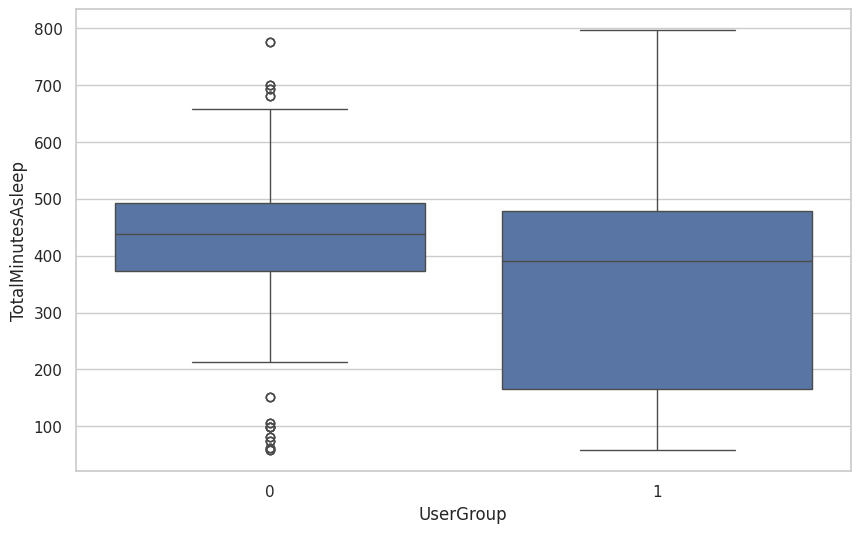

In [346]:
sns.boxplot(x="UserGroup", y="TotalMinutesAsleep", data=sleep_df);

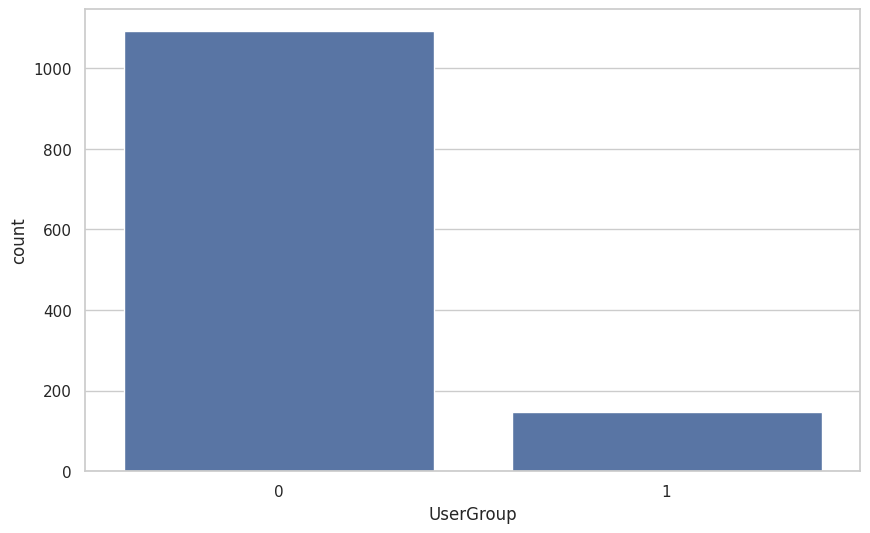

In [347]:
sns.countplot(data = sleep_df, x = 'UserGroup');

Number of rows in each group (in the sleep_df dataframe):

In [348]:
sleep_df['UserGroup'].value_counts()

0    1092
1     147
Name: UserGroup, dtype: int64

In [349]:
print('Distinct users in group 0 (Less Sedentary group)')
print(sleep_df[sleep_df['UserGroup']==0]['Id'].nunique())

print('Distinct users in group 1 (More Sedentary group)')
print(sleep_df[sleep_df['UserGroup']==1]['Id'].nunique())

Distinct users in group 0 (Less Sedentary group)
14
Distinct users in group 1 (More Sedentary group)
10


We observe a major data imbalance: the less sedentary group is overrepresented in sleep records (364 vs. 49) and includes a higher number of unique users (14 vs. 10). This discrepancy could skew our analysis.

**Joinning Ativity data with sleep data**


In [350]:
join_query = """
SELECT
	A.Id,
	A.ActivityDate,
	A.SedentaryMinutes,
	S.TotalMinutesAsleep
FROM
	dailyActivity_merged A
INNER JOIN sleepDay_merged S
ON
	A.Id = S.Id AND
    A.ActivityDate = S.SleepDay;
"""
activity_sleep_df = pd.read_sql(join_query, con)

In [351]:
activity_sleep_df.head()

,Id,ActivityDate,SedentaryMinutes,TotalMinutesAsleep
0,1503960366,2016-04-12,728,327
1,1503960366,2016-04-13,776,384
2,1503960366,2016-04-15,726,412
3,1503960366,2016-04-16,773,340
4,1503960366,2016-04-17,539,700


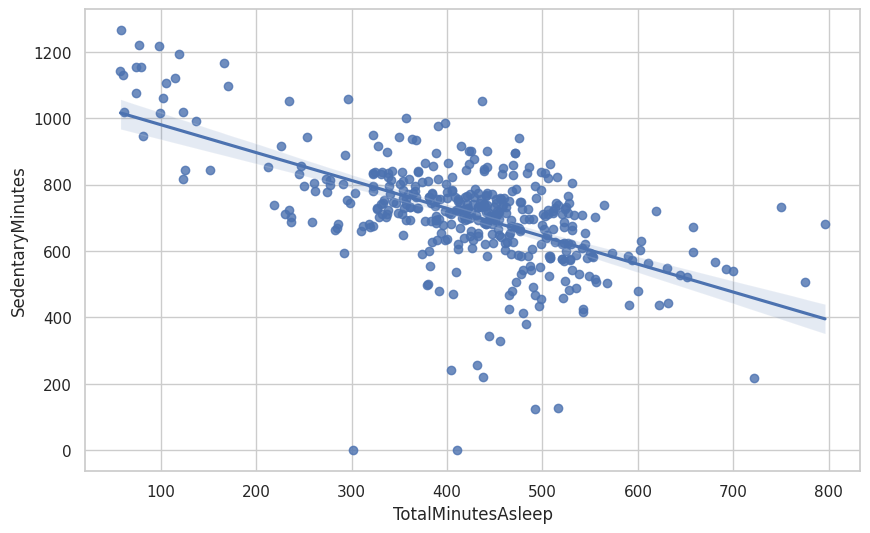

In [352]:
sns.regplot(data = activity_sleep_df,
                x = 'TotalMinutesAsleep',
                y = 'SedentaryMinutes');

This is an interesting graph: there is a clear tendency of users with more minutes asleep to be less sedentary. So, one conclusion might be that the more you sleep, the more active you are during the day!

# Share
We'll start our sharing with some basic descriptions. Our dataset has data on 33 different users who logged their daily activities during the period between 03.12.2016-05.12.2016.


**Describing the data**

The main data on daily activities is in the full_dailyActivity_df and we can get descriptive statistics with the describe() method:

In [353]:
sns.set_palette("hls")
sns.set_context("paper", font_scale=2)

In [354]:
full_dailyActivity_df.loc[:, full_dailyActivity_df.columns != 'Id'].describe().T

,count,mean,std,min,25%,50%,75%,max
TotalSteps,2808.0,7670.551282,5071.571415,0.0,3818.000,7441.000,10733.5000,36019.000000
TotalDistance,2808.0,5.513162,3.915101,0.0,2.645,5.265,7.7200,28.030001
TrackerDistance,2808.0,5.498750,3.897754,0.0,2.645,5.265,7.7125,28.030001
LoggedActivitiesDistance,2808.0,0.108633,0.620959,0.0,0.000,0.000,0.0000,4.942142
VeryActiveDistance,2808.0,1.509103,2.661853,0.0,0.000,0.220,2.0900,21.920000
ModeratelyActiveDistance,2808.0,0.569968,0.884371,0.0,0.000,0.240,0.8000,6.480000
LightActiveDistance,2808.0,3.355096,2.032533,0.0,1.960,3.380,4.7900,10.710000
SedentaryActiveDistance,2808.0,0.001613,0.007358,0.0,0.000,0.000,0.0000,0.110000
VeryActiveMinutes,2808.0,21.255342,32.874018,0.0,0.000,4.000,32.0000,210.000000
FairlyActiveMinutes,2808.0,13.622863,20.003238,0.0,0.000,7.000,19.0000,143.000000


For the sleep habits data, we can use the describe() method on the sleep_df dataframe:

In [355]:
sleep_df.loc[:, sleep_df.columns != 'Id'].describe()

,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,UserGroup
count,1239.000000,1239.000000,1239.000000,1239.000000
mean,1.118644,419.467312,458.639225,0.118644
std,0.345242,118.249047,126.998899,0.323500
min,1.000000,58.000000,61.000000,0.000000
25%,1.000000,361.000000,403.000000,0.000000
50%,1.000000,433.000000,463.000000,0.000000
75%,1.000000,490.000000,526.000000,0.000000
max,3.000000,796.000000,961.000000,1.000000


**Distributions**

By acivity type

Three types of activities:

* Very Active
* Fairly Active
* Lightly Active

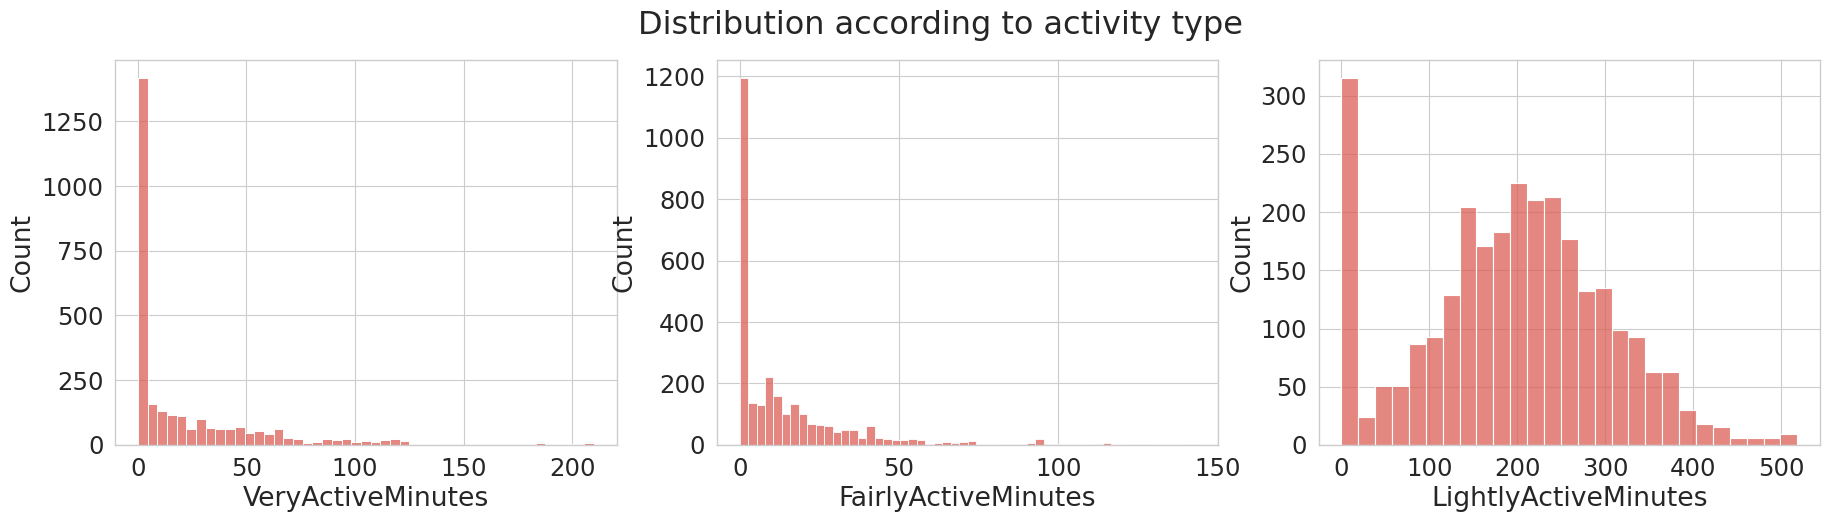

In [356]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type')

sns.histplot(data = full_dailyActivity_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = full_dailyActivity_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = full_dailyActivity_df, x = 'LightlyActiveMinutes', ax = axes[2]);

Of all 940 original rows in our data, only 462 rows have partially logged their activities in a day. For these records:

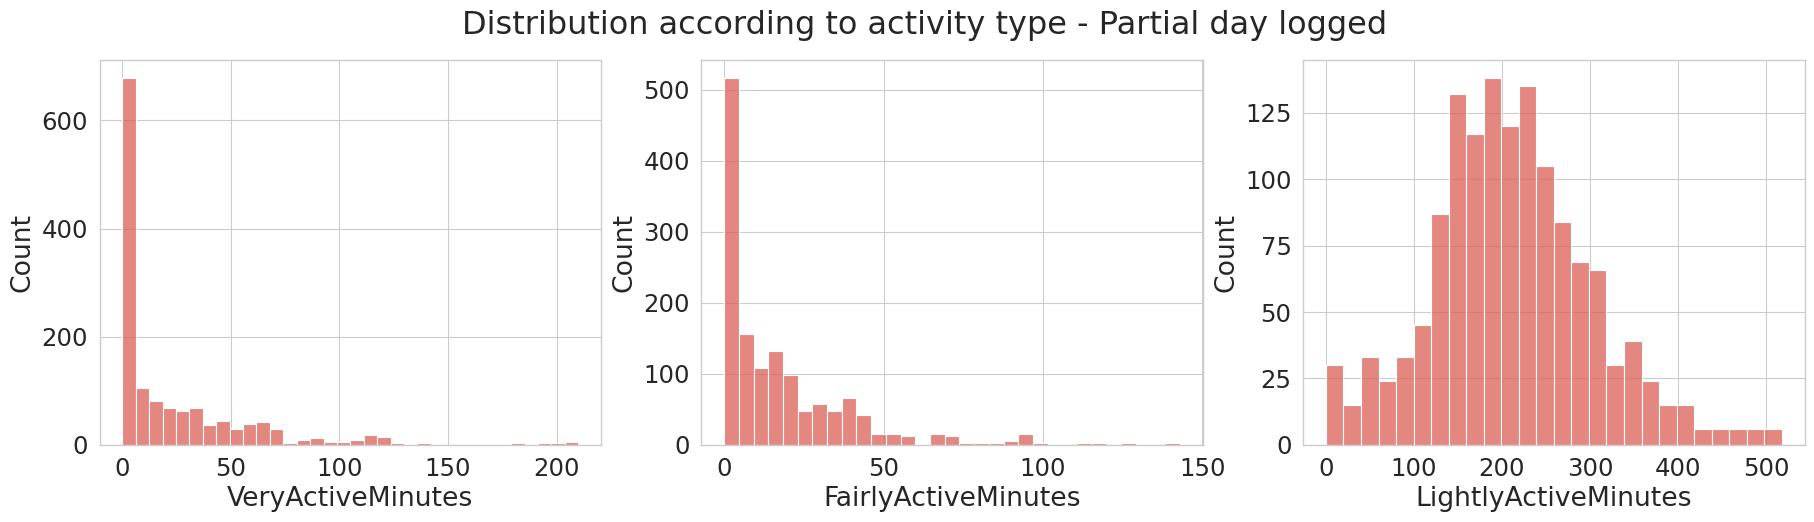

In [357]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution according to activity type - Partial day logged')

sns.histplot(data = not_logged_day_df, x = 'VeryActiveMinutes', ax = axes[0]);

sns.histplot(data = not_logged_day_df, x = 'FairlyActiveMinutes', ax = axes[1]);

sns.histplot(data = not_logged_day_df, x = 'LightlyActiveMinutes', ax = axes[2]);

The LightlyActiveMinutes distribution is very symmetric with no peak at very few minutes of activity. Users who log the entire day may end up registering a lot of LightlyActiveMinutes while those who log only a part of the day might be registering only activities with higher demand.

Let's see the distribution of total logged time in this second group.

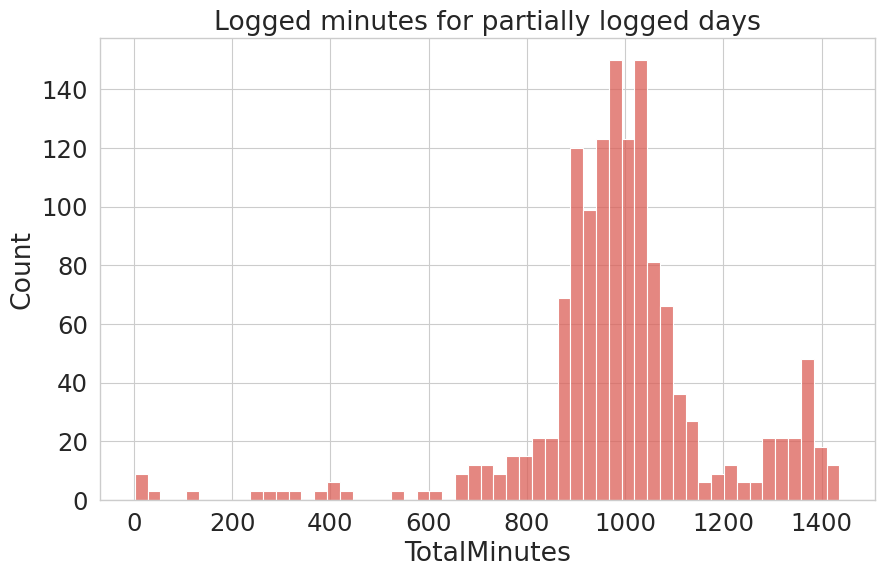

In [358]:
sns.histplot(data = not_logged_day_df, x = 'TotalMinutes')
plt.title('Logged minutes for partially logged days');

**Calories and Distance**


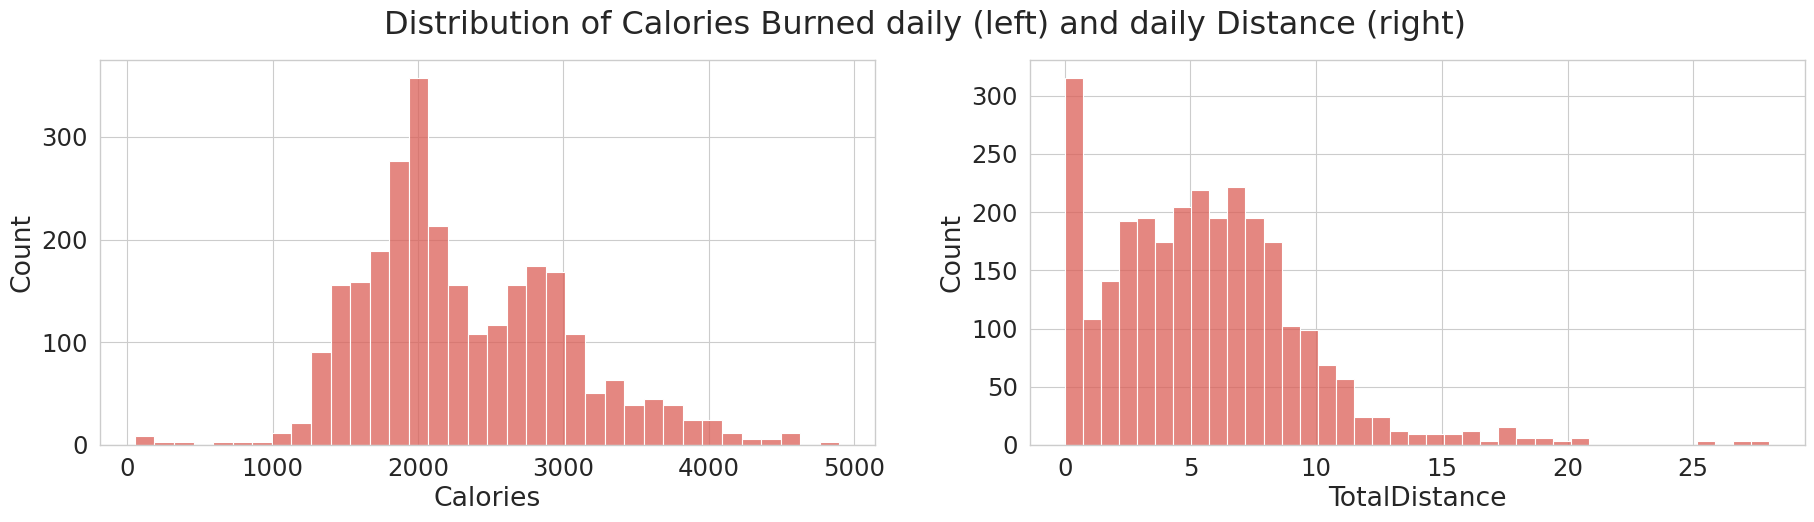

In [359]:
fig, axes = plt.subplots(1, 2, figsize=(22, 5))
fig.suptitle('Distribution of Calories Burned daily (left) and daily Distance (right)')

sns.histplot(data=full_dailyActivity_df, x="Calories", ax = axes[0]);

sns.histplot(data=full_dailyActivity_df, x="TotalDistance", ax = axes[1]);

**Sleeping habits**


Text(380, 30, '7h of sleep')

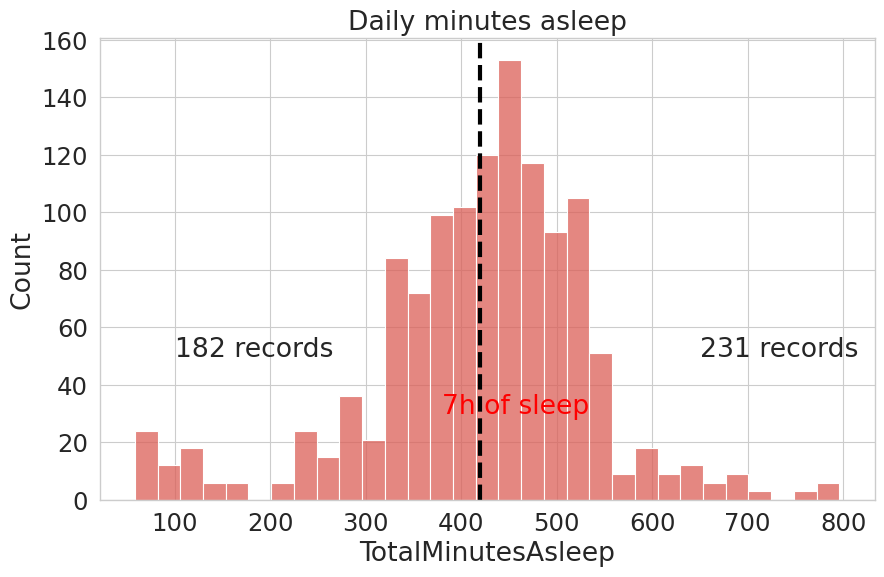

In [360]:
sns.histplot(data = sleep_df, x = 'TotalMinutesAsleep')
plt.title('Daily minutes asleep')

plt.axvline(420, 0, 65, color='black', ls = '--', lw = 3);

plt.annotate('182 records', (100,50))
plt.annotate('231 records', (650,50))
plt.annotate('7h of sleep', (380,30), color='red')

Day of the week: does it make a difference?

Now that we had a galnce at our data and its distributions, does the day of the week make a considerable difference in user behavious to justify some marketing or functionality built to target specific days of activity?

<ipython-input-361-d821296fadb6>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(x="dow", y="avg_steps", data=activity_dist, ax=axes[0]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);
<ipython-input-361-d821296fadb6>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(x="dow", y="avg_calories", data=activity_dist, ax=axes[1]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);
<ipython-input-361-d821296fadb6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  sns.boxplot(x="dow", y="avg_distance", data=activity_dist, ax=axes[2]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);


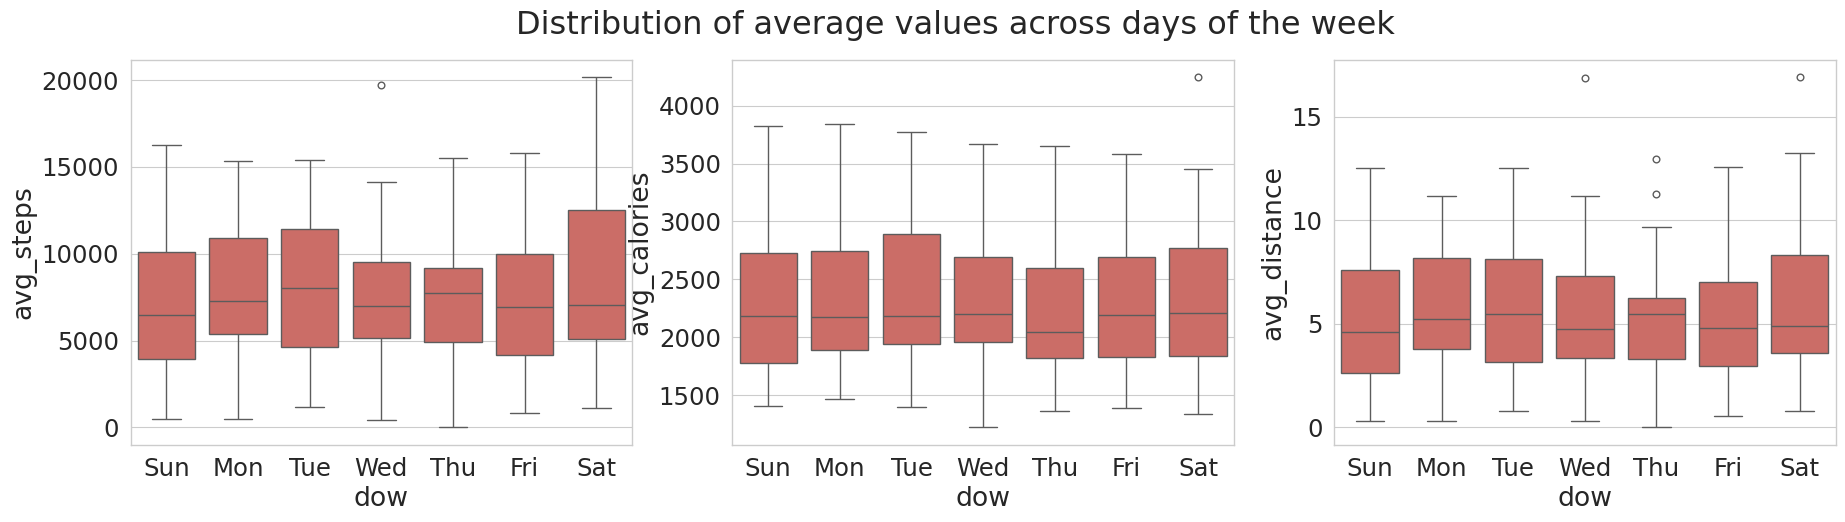

In [361]:
fig, axes = plt.subplots(1, 3, figsize=(22, 5))
fig.suptitle('Distribution of average values across days of the week')

sns.boxplot(x="dow", y="avg_steps", data=activity_dist, ax=axes[0]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

sns.boxplot(x="dow", y="avg_calories", data=activity_dist, ax=axes[1]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

sns.boxplot(x="dow", y="avg_distance", data=activity_dist, ax=axes[2]).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

With the current data, there is no considerable difference between the average Steps Taken, Calories Burned or Distance across different days of the week.

**Sleep across days of the week**

<ipython-input-362-2ca79a9ce9fe>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  order = ['0','1','2','3','4','5','6']).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);


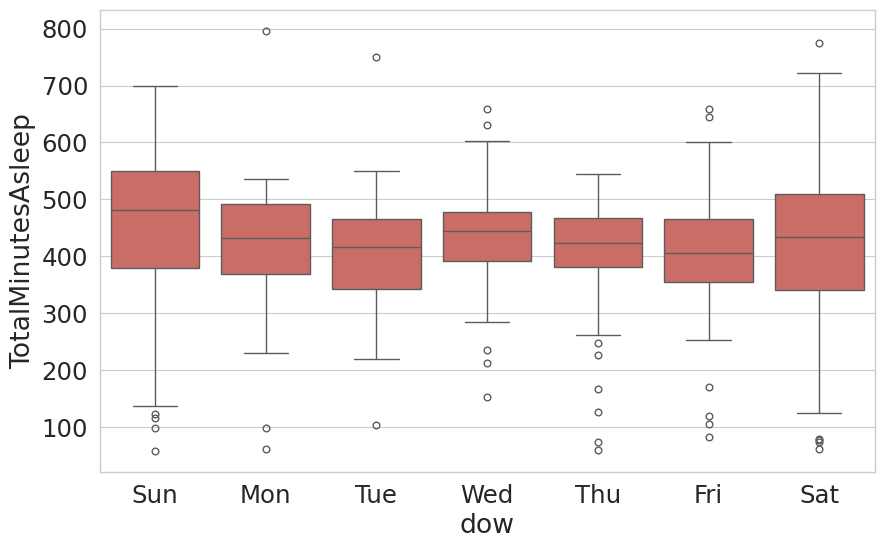

In [362]:
sns.boxplot(x="dow", y="TotalMinutesAsleep", data=sleep_df,
            order = ['0','1','2','3','4','5','6']).set_xticklabels(['Sun','Mon','Tue','Wed','Thu','Fri', 'Sat']);

No distinct differences appear between weekdays and sleep patterns.  However, Sundays generally have the longest median sleep, while Saturdays show the greatest variation in sleep duration.

**Do calories burned depend on steps taken?**

intercept: 1689.1510000144012
slope: [0.08138959]


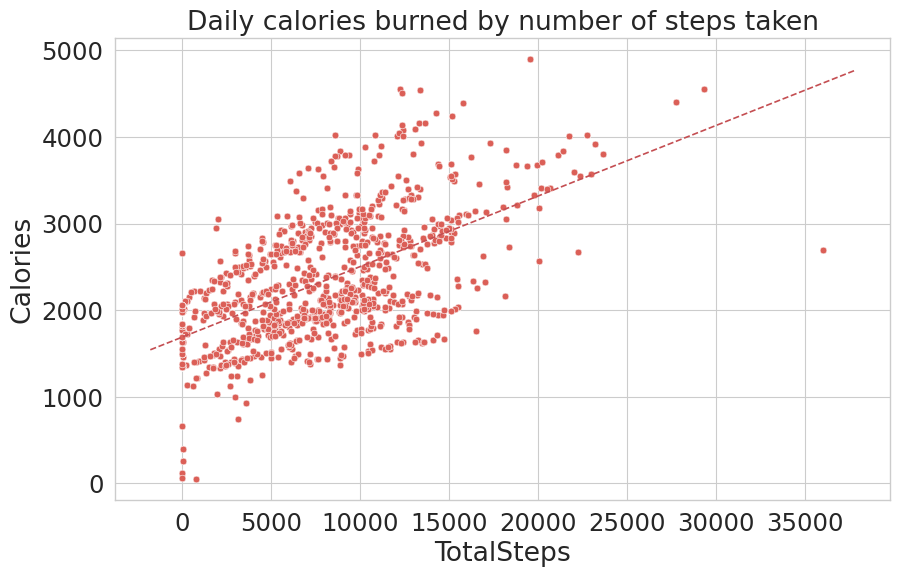

In [363]:
get_regression(full_dailyActivity_df)
plt.ylabel('Calories')
plt.title('Daily calories burned by number of steps taken');

As expected, daily calorie burn increases with more steps taken. Interestingly, the regression line's intercept reveals something unexpected: the estimated calories burned even with zero steps. This represents the basal metabolic rate (BMR), the energy your body uses for basic functions at rest.  Healthline confirms this concept. Let's use linear regression to calculate the intercept from our data. We predict a BMR of around 1689.15 Calories.  Next, we can explore the distribution of BMR within our dataset.

In [364]:
full_dailyActivity_df[full_dailyActivity_df['TotalSteps']==0]['Calories'].describe()

count     219.000000
mean     1747.876712
std       406.378386
min        57.000000
25%      1557.000000
50%      1841.000000
75%      1981.000000
max      2664.000000
Name: Calories, dtype: float64

**Categorizing users**

Now that we know a bit more about users activities, can we categorize our users in a way that is natural from the data?

**How much time in a day do users spend being sedentary?**

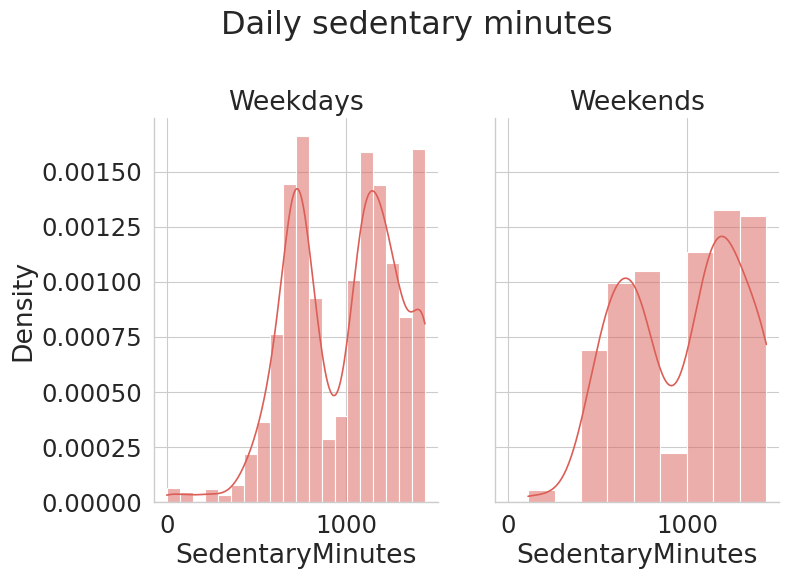

In [365]:
g = sns.FacetGrid(weekend_check, col="weekend", height=6, aspect=.7)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Daily sedentary minutes')
axes = g.axes.flatten()
axes[0].set_title("Weekdays")
axes[1].set_title("Weekends");

It seems there are two groups of users based on the distribution of SedentaryMinutes. We can see the average SedentaryMinutes per user:

In [366]:
avg_sed_minutes

,Id,AvgSedentaryMinutes
0,1927972279,1317.419355
1,6775888955,1299.423077
2,8253242879,1287.368421
3,8583815059,1267.225806
4,1624580081,1257.741935
5,4020332650,1237.258065
6,2320127002,1220.096774
7,4057192912,1217.250000
8,1844505072,1206.612903
9,6290855005,1193.034483


Calling group 1 the more sedentary one and group 0 the less sedentary one, we can ask if this behaviour persist on weekends?

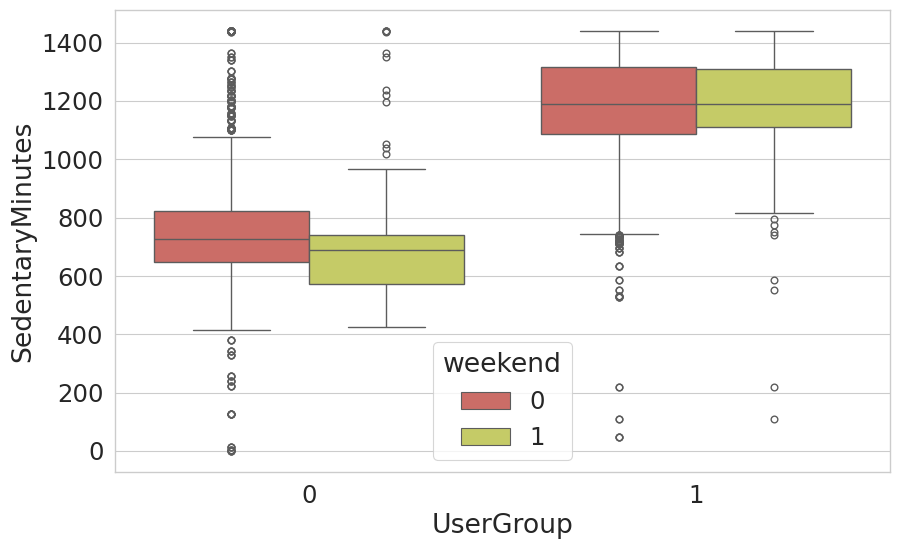

In [367]:
sns.boxplot(x="UserGroup", y="SedentaryMinutes", hue = 'weekend', data=weekend_check);

**Do average values change on weekends?**

In [368]:
weekend_avgs

,weekend,AVG(SedentaryMinutes),AVG(Calories),AVG(TotalSteps),AVG(TotalDistance)
0,0,992.552233,2303.044660,7646.220583,5.49386
1,1,977.110204,2309.546939,7550.571429,5.44600


**Do sleep habits influence sedentary time?**

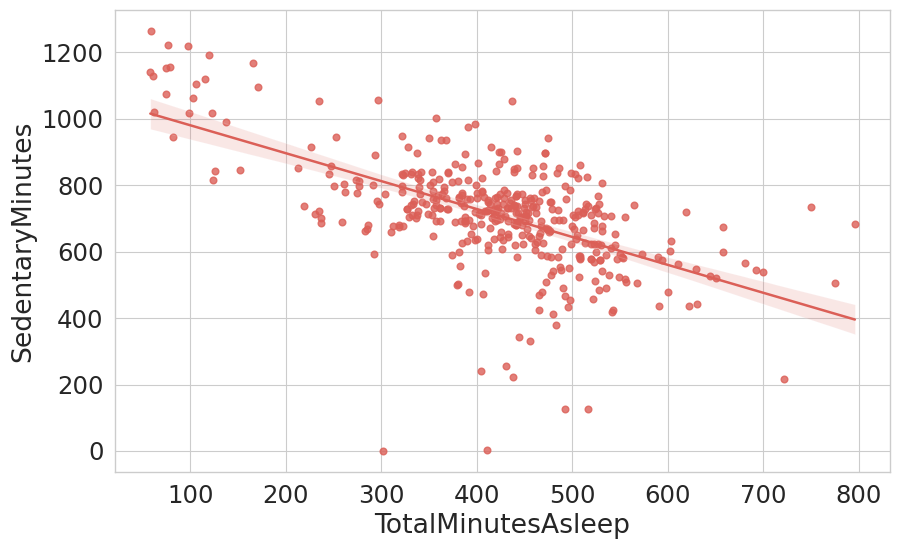

In [369]:
sns.regplot(data = activity_sleep_df,
                x = 'TotalMinutesAsleep',
                y = 'SedentaryMinutes');

The data tells an interesting story: there's a clear trend linking longer sleep with reduced sedentary time.  One possible interpretation is that adequate sleep might promote a more active lifestyle.

# Act
## Key Insights from User Activity Data

* **Consistent Activity Patterns:** Analysis shows no significant variation in user activity across weekdays and weekends.

* **Step Count Insights:** Users average 7670 steps daily. The CDC associates higher step counts with improved health outcomes.
    * **Actionable Recommendation:** Integrate real-time step tracking and goal setting based on CDC guidelines (e.g., 8,000 - 12,000 steps).

* **Calorie Expenditure:** Data reveals a linear relationship between steps and calories burned.
    * **Actionable Recommendation:** Develop a calorie expenditure prediction model, potentially incorporating MET data.

* **Sleep & Activity:** Increased sleep duration correlates with decreased sedentary time, supporting CDC recommendations for healthy sleep habits.  
    * **Actionable Recommendation:** Explore features promoting consistent sleep schedules.







